# Creating B1 text versions

<br>

**Language: Python**

This notebook shows the process used for creating a set of 10 texts from the B1 base text by carefully manipulating collocational sophistication and accuracy. See dissertation section 6.1.1.1.

**Notebook contents:**
- [Initial setup](#Initial-setup)
- [New columns](#New-columns)
- [B1 texts](#B1-texts)
    - [Text 1](#Text-1)
    - [Text 2](#Text-2)
    - [Text 3](#Text-3)
    - [Text 4](#Text-4)
    - [Text 5](#Text-5)
    - [Text 6](#Text-6)
    - [Text 7](#Text-7)
    - [Text 8](#Text-8)
    - [Text 9](#Text-9)
    - [Text 10](#Text-10)
- [Final B1 dataframe](#Final-B1-dataframe)  

In total, there are 33 different text versions:
- 10 in B1
- 10 in B2
- 10 in C1
- 3 control texts (normalized texts)

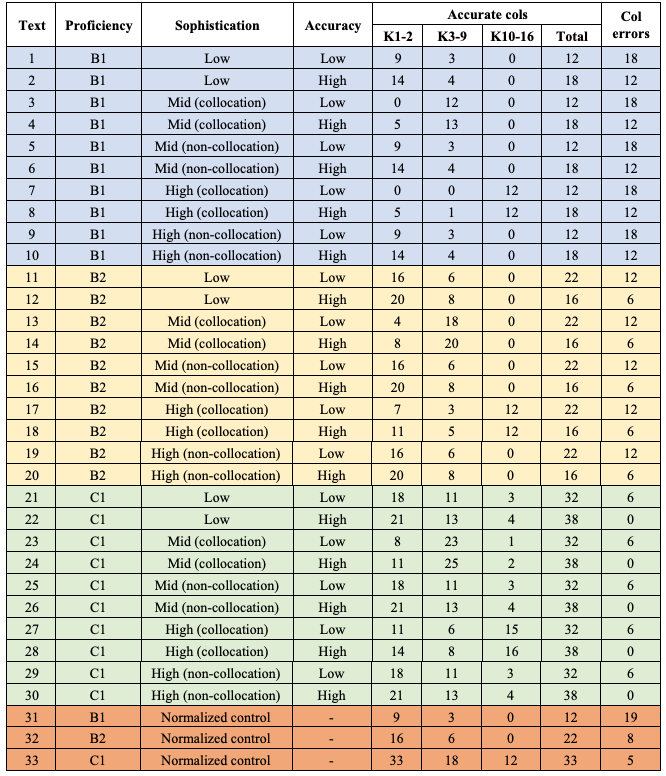

## Initial setup

In [1]:
# Import necessary modules

import pandas as pd
import pprint
from IPython.core.interactiveshell import InteractiveShell
import joblib

In [2]:
# Set preferred notebook format

InteractiveShell.ast_node_interactivity = "all" # Show all output, not just last item
pd.set_option('display.max_columns', 999) # Allow viewing of all columns

In [3]:
# Load necessary dictionary

kband_dict = joblib.load('../../COCA_data/COCA_2020_lemma_Kband_dict.pkl') # All items lower-case

**Note:** As described in the [README.md]('../README.md'), The frequency information from COCA referenced here is not freely available but can be purchased at https://corpus.byu.edu/coca. Without this data you will be able to see a few rows of these dataframes, but will not be able to run the code yourself. 

Using the code below, these data were queried to find potential collocation replacements (a frequency-based approach to collocation identification), followed by manual selection based on best fit and the checklist described in dissertation section 5.2.1 (a phraseological approach to collocation identification).

In [4]:
# Code to look up possible collocates

cols_df = joblib.load('../../COCA_data/COCA_2020_collocate_df.pkl')

# Example - adjectives that collocate with the adverb 'spiritually'
cols_df.loc[(cols_df.lem_PoS == ('spiritually','r')) & (cols_df.collPoS == 'j')].sort_values('MI',ascending=False).head()

,lemRank,lemma,lemPoS,coll,collPoS,freq,MI,coll_before_node,lem_PoS,coll_PoS,collocation
3196157,11070,spiritually,r,uplifting,j,22,8.66,0.05,"(spiritually, r)","(uplifting, j)","((spiritually, r), (uplifting, j))"
3196267,11070,spiritually,r,enriching,j,5,8.05,0.00,"(spiritually, r)","(enriching, j)","((spiritually, r), (enriching, j))"
3196251,11070,spiritually,r,bereft,j,6,7.58,0.00,"(spiritually, r)","(bereft, j)","((spiritually, r), (bereft, j))"
3196227,11070,spiritually,r,adrift,j,7,7.41,0.14,"(spiritually, r)","(adrift, j)","((spiritually, r), (adrift, j))"
3196253,11070,spiritually,r,evolved,j,6,7.28,0.00,"(spiritually, r)","(evolved, j)","((spiritually, r), (evolved, j))"


In [5]:
# Read in PSL3 list

f = open("../docs/psl3.txt", "r")
PSL3 = f.read()
PSL3 = sorted(PSL3.split('\n'))

In [6]:
# Load pickle file from previous notebook

texts_df = joblib.load('../docs/base_texts.pkl')
texts_df = texts_df.loc[[0]]
texts_df

,text_id,text,lemmas_NLTK,lemmas_CLAWS,correct_cols,col_errors,K1to2,K3to9,K10to16,kband_cols,K1to2_cols,K3to9_cols,K10to16_cols,bad_cols,kband_non_cols
0,text1,I disagree that point about children brought u...,"[I, disagree, that, point, about, child, bring...","[(I, p), (disagree, v), (that, d), (point, n),...",12,18,9,3,0,"[(1, [('good', 'j'), ('effect', 'n')]), (1, [(...","[(1, [('good', 'j'), ('effect', 'n')]), (1, [(...","[(4, [('entrance', 'n'), ('to', 'i'), ('the', ...",[],"[disagree that point, show that situation, cou...","[(1, (I, p)), (1, (about, i)), (1, (child, n))..."


## B1 texts

All high-freq collocations are also checked for _inclusion_ in PSL3. All mid-freq and low-freq collocations are checked for _exclusion_ from PSL3.

### Text 1
- Already in dataframe

### Text 2
- B1
- low sophistication
- high accuracy

Use Text 1 as base (low sophistication) and then correct 6 collocation errors:
- 5 new correct K1-K2 collocations
- 1 new correct K3-9 collocation

In [7]:
# Correct 6 of these

texts_df.loc[texts_df.text_id == 'text1','bad_cols'].to_list()[0]

['disagree that point',
 'show that situation',
 'country parents',
 'is not effect to',
 'from twenty ages',
 'social experience',
 'age is late',
 'work by (children ages)',
 'culture about',
 'could their money',
 'accept the money by',
 'study at money',
 'positive school',
 'prepared their life',
 'work my country',
 'very disagree',
 'prepare with many problems',
 'for future time']

In [8]:
# Find freq bands to minimize changes needed

B1_bad_cols_CLAWS = [[('disagree', 'v'), ('that', 'd'), ('point', 'n')],
                     [('show', 'v'), ('that', 'd'), ('situation', 'n')],
                     [('country', 'n'), ('parent', 'n')],
                     [('be','v'),('not','x'),('effect', 'n'), ('to', 'i')],
                     [('from', 'i'), ('twenty', 'm'), ('age', 'n')],
                     [('social', 'j'), ('experience', 'n')],                 
                     [('age', 'n'), ('be', 'v'), ('late', 'j')],
                     [('work', 'n'), ('by', 'i')],
                     [('culture', 'n'), ('about', 'i')],
                     [('could', 'v'), ('their', 'a'), ('money', 'n')],
                     [('accept', 'v'), ('the', 'a'), ('money', 'n'), ('by', 'i')],
                     [('study', 'v'), ('at', 'i'), ('money', 'n')],
                     [('positive','j'),('school','n')],
                     [('prepare', 'v'), ('their', 'a'), ('life', 'n')],
                     [('work', 'v'), ('my', 'a'), ('country', 'n')],
                     [('very', 'r'), ('disagree', 'v')],
                     [('prepare','v'),('with','i'),('many','d'),('problem','n')],
                     [('for','i'),('future','j'),('time','n')]]
len(B1_bad_cols_CLAWS)

18

In [9]:
B1_bad_cols_kband = [[(i,kband_dict[i]) for i in x] for x in B1_bad_cols_CLAWS]
B1_bad_cols_kband

# Only 'disagree that point', 'from twenty ages', and 'very disagree' our K3, all others K1-2

[[(('disagree', 'v'), 3), (('that', 'd'), 1), (('point', 'n'), 1)],
 [(('show', 'v'), 1), (('that', 'd'), 1), (('situation', 'n'), 1)],
 [(('country', 'n'), 1), (('parent', 'n'), 1)],
 [(('be', 'v'), 1), (('not', 'x'), 1), (('effect', 'n'), 1), (('to', 'i'), 1)],
 [(('from', 'i'), 1), (('twenty', 'm'), 3), (('age', 'n'), 1)],
 [(('social', 'j'), 1), (('experience', 'n'), 1)],
 [(('age', 'n'), 1), (('be', 'v'), 1), (('late', 'j'), 1)],
 [(('work', 'n'), 1), (('by', 'i'), 1)],
 [(('culture', 'n'), 1), (('about', 'i'), 1)],
 [(('could', 'v'), 1), (('their', 'a'), 1), (('money', 'n'), 1)],
 [(('accept', 'v'), 1),
  (('the', 'a'), 1),
  (('money', 'n'), 1),
  (('by', 'i'), 1)],
 [(('study', 'v'), 2), (('at', 'i'), 1), (('money', 'n'), 1)],
 [(('positive', 'j'), 2), (('school', 'n'), 1)],
 [(('prepare', 'v'), 1), (('their', 'a'), 1), (('life', 'n'), 1)],
 [(('work', 'v'), 1), (('my', 'a'), 1), (('country', 'n'), 1)],
 [(('very', 'r'), 1), (('disagree', 'v'), 3)],
 [(('prepare', 'v'), 1),
  (

In [10]:
# Checking that new K1-2 collocations are correct frequency

kband_dict[('social','j')]
kband_dict[('life','n')]
kband_dict[('experience','n')]
kband_dict[('situation','n')]
kband_dict[('future','n')]
kband_dict[('excellent','j')]

'social' in PSL3
'life' in PSL3
'experience' in PSL3
'situation' in PSL3
'future' in PSL3
'excellent' in PSL3

# Everything else is clearly same high frequency

1

1

1

1

1

2

True

True

True

True

True

True

In [11]:
# Checking that new K3-9 collocation is correct frequency

kband_dict[('really','r')]
kband_dict[('disagree','v')]

'really' in PSL3
'disagree' in PSL3

1

3

True

False

Summary of changes:

K1-K2
1. effect to -> effect on
2. social experience -> life experience
3. show that situation -> see that situation
4. for future time -> for the future
5. positive school -> excellent school

K3-9
6. am very disagree -> must really disagree

In [12]:
# New text2 text

text2_text ="I disagree that point about children brought up in families are prepared their life and then are good parents. because, I see that situation around me at our country parents. They want they had everything give to their children and also could buying things like excellent school. but, their behavior is not good effect on them\nOn the other hand, children brought up by wealthy parents, they are strong, that means they can be prepare with many problems of being adults. They working to have money, that could buy everything they want\nIn my case, I start work from twenty ages I start work My country and work as a journalist for money I had life experience and I got a money for myself. however, My age is late to work by children ages and I heard about children doing work by another countries that countries had a culture about children They start work when they fifteen, and it is very young. They doing work for their pocket money and is good.\nthey could their money buy something or entrance to the bank. that is good they could buy something. now and for the future. also, our country's children do this. but, many children accept the money by their parents. which persons got a pocket money over the twenty ages. but I must really disagree with that. I think, if children had a work and they study at money, they perfectly prepared their adult life after they must be parents."

In [13]:
# New text2 lemmasNLTK

text2_lemmasNLTK = ['I', 'disagree', 'that', 'point', 'about', 'child', 'bring', 'up', 'in', 'family', 'be', 'prepare', 'their', 'life', 'and', 'then', 'be', 'good', 'parent', '.', 'because', ',', 'I', 'see', 'that', 'situation', 'around', 'me', 'at', 'our', 'country', 'parent', '.', 'They', 'want', 'they', 'have', 'everything', 'give', 'to', 'their', 'child', 'and', 'also', 'could', 'buy', 'thing', 'like', 'excellent', 'school', '.', 'but', ',', 'their', 'behavior', 'be', 'not', 'good', 'effect', 'on', 'them', 'on', 'the', 'other', 'hand', ',', 'child', 'bring', 'up', 'by', 'wealthy', 'parent', ',', 'they', 'be', 'strong', ',', 'that', 'mean', 'they', 'can', 'be', 'prepare', 'with', 'many', 'problem', 'of', 'be', 'adult', '.', 'They', 'work', 'to', 'have', 'money', ',', 'that', 'could', 'buy', 'everything', 'they', 'want', 'in', 'my', 'case', ',', 'I', 'start', 'work', 'from', 'twenty', 'age', 'I', 'start', 'work', 'my', 'country', 'and', 'work', 'as', 'a', 'journalist', 'for', 'money', 'I', 'have', 'life', 'experience', 'and', 'I', 'get', 'a', 'money', 'for', 'myself', '.', 'however', ',', 'my', 'age', 'be', 'late', 'to', 'work', 'by', 'child', 'age', 'and', 'I', 'hear', 'about', 'child', 'do', 'work', 'by', 'another', 'country', 'that', 'country', 'have', 'a', 'culture', 'about', 'child', 'They', 'start', 'work', 'when', 'they', 'fifteen', ',', 'and', 'it', 'be', 'very', 'young', '.', 'They', 'do', 'work', 'for', 'their', 'pocket', 'money', 'and', 'be', 'good', '.', 'they', 'could', 'their', 'money', 'buy', 'something', 'or', 'entrance', 'to', 'the', 'bank', '.', 'that', 'be', 'good', 'they', 'could', 'buy', 'something', '.', 'now', 'and', 'for', 'the', 'future', '.', 'also', ',', 'our', "country's", 'child', 'do', 'this', '.', 'but', ',', 'many', 'child', 'accept', 'the', 'money', 'by', 'their', 'parent', '.', 'which', 'person', 'get', 'a', 'pocket', 'money', 'over', 'the', 'twenty', 'age', '.', 'but', 'I', 'must', 'really', 'disagree', 'with', 'that', '.', 'I', 'think', ',', 'if', 'child', 'have', 'a', 'work', 'and', 'they', 'study', 'at', 'money', ',', 'they', 'perfectly', 'prepare', 'their', 'adult', 'life', 'after', 'they', 'must', 'be', 'parent', '.']

In [14]:
# New text2 lemmasCLAWS

text2_lemmasCLAWS = [('I', 'p'), ('disagree', 'v'), ('that', 'd'), ('point', 'n'), ('about', 'i'), ('child', 'n'), ('bring', 'v'), ('up', 'r'), ('in', 'i'), ('family', 'n'), ('be', 'v'), ('prepare', 'v'), ('their', 'a'), ('life', 'n'), ('and', 'c'), ('then', 'r'), ('be', 'v'), ('good', 'j'), ('parent', 'n'), ('because', 'c'), ('I', 'p'), ('see', 'v'), ('that', 'd'), ('situation', 'n'), ('around', 'i'), ('me', 'p'), ('at', 'i'), ('our', 'a'), ('country', 'n'), ('parent', 'n'), ('they', 'p'), ('want', 'v'), ('they', 'p'), ('have', 'v'), ('everything', 'p'), ('give', 'v'), ('to', 'i'), ('their', 'a'), ('child', 'n'), ('and', 'c'), ('also', 'r'), ('could', 'v'), ('buy', 'v'), ('thing', 'n'), ('like', 'i'), ('excellent', 'j'), ('school', 'n'), ('but', 'c'), ('their', 'a'), ('behavior', 'n'), ('be', 'v'), ('not', 'x'), ('good', 'j'), ('effect', 'n'), ('on', 'i'), ('them', 'a'), ('on', 'i'), ('the', 'a'), ('other', 'j'), ('hand', 'n'), ('child', 'n'), ('bring', 'v'), ('up', 'r'), ('by', 'i'), ('wealthy', 'j'), ('parent', 'n'), ('they', 'p'), ('be', 'v'), ('strong', 'j'), ('that', 'd'), ('mean', 'v'), ('they', 'p'), ('can', 'v'), ('be', 'v'), ('prepare', 'v'), ('with', 'i'), ('many', 'd'), ('problem', 'n'), ('of', 'i'), ('be', 'v'), ('adult', 'n'), ('they', 'p'), ('work', 'v'), ('to', 't'), ('have', 'v'), ('money', 'n'), ('that', 'd'), ('could', 'v'), ('buy', 'v'), ('everything', 'p'), ('they', 'p'), ('want', 'v'), ('in', 'i'), ('my', 'a'), ('case', 'n'), ('I', 'p'), ('start', 'v'), ('work', 'n'), ('from', 'i'), ('twenty', 'm'), ('age', 'n'), ('I', 'p'), ('start', 'v'), ('work', 'v'), ('my', 'a'), ('country', 'n'), ('and', 'c'), ('work', 'v'), ('as', 'i'), ('a', 'a'), ('journalist', 'n'), ('for', 'i'), ('money', 'n'), ('I', 'p'), ('have', 'v'), ('life', 'n'), ('experience', 'n'), ('and', 'c'), ('I', 'p'), ('get', 'v'), ('a', 'a'), ('money', 'n'), ('for', 'i'), ('myself', 'p'), ('however', 'r'), ('my', 'a'), ('age', 'n'), ('be', 'v'), ('future', 'n'), ('to', 't'), ('work', 'v'), ('by', 'i'), ('child', 'n'), ('age', 'n'), ('and', 'c'), ('I', 'p'), ('hear', 'v'), ('about', 'i'), ('child', 'n'), ('do', 'v'), ('work', 'n'), ('by', 'i'), ('another', 'd'), ('country', 'n'), ('that', 'c'), ('country', 'n'), ('have', 'v'), ('a', 'a'), ('culture', 'n'), ('about', 'i'), ('child', 'n'), ('they', 'p'), ('start', 'v'), ('work', 'n'), ('when', 'c'), ('they', 'p'), ('fifteen', 'm'), ('and', 'c'), ('it', 'p'), ('be', 'v'), ('very', 'r'), ('young', 'j'), ('they', 'p'), ('do', 'v'), ('work', 'n'), ('for', 'i'), ('their', 'a'), ('pocket', 'n'), ('money', 'n'), ('and', 'c'), ('be', 'v'), ('good', 'j'), ('they', 'p'), ('could', 'v'), ('their', 'a'), ('money', 'n'), ('buy', 'v'), ('something', 'p'), ('or', 'c'), ('entrance', 'n'), ('to', 'i'), ('the', 'a'), ('bank', 'n'), ('that', 'd'), ('be', 'v'), ('good', 'j'), ('they', 'p'), ('could', 'v'), ('buy', 'v'), ('something', 'p'), ('now', 'r'), ('and', 'c'), ('for', 'i'), ('the', 'a'), ('future', 'n'), ('also', 'r'), ('our', 'a'), ("country's", 'd'), ('child', 'n'), ('do', 'v'), ('this', 'd'), ('but', 'c'), ('many', 'd'), ('child', 'n'), ('accept', 'v'), ('the', 'a'), ('money', 'n'), ('by', 'i'), ('their', 'a'), ('parent', 'n'), ('which', 'd'), ('person', 'n'), ('get', 'v'), ('a', 'a'), ('pocket', 'n'), ('money', 'n'), ('over', 'i'), ('the', 'a'), ('twenty', 'm'), ('age', 'n'), ('but', 'c'), ('I', 'p'), ('must','v'),('really', 'r'), ('disagree', 'v'), ('with','i'), ('that', 'd'), ('I', 'p'), ('think', 'v'), ('if', 'c'), ('child', 'n'), ('have', 'v'), ('a', 'a'), ('work', 'n'), ('and', 'c'), ('they', 'p'), ('study', 'v'), ('at', 'i'), ('money', 'n'), ('they', 'p'), ('perfectly', 'r'), ('prepare', 'v'), ('their', 'a'), ('adult', 'n'), ('life', 'n'), ('after', 'c'), ('they', 'p'), ('must', 'v'), ('be', 'v'), ('parent', 'n')]

In [15]:
# New text2 cols

text2_new_K1to2_cols = [(2,[('effect', 'n'), ('on', 'i')]),
                         (2,[('excellent', 'j'), ('school', 'n')]),
                         (1,[('life', 'n'), ('experience', 'n')]),
                         (2,[('see', 'v'), ('that', 'd'), ('situation', 'n')]),
                         (1,[('for', 'i'), ('the', 'a'), ('future', 'n')])]

text2_new_K3to9_cols = [(3,[('must','v'),('really', 'r'), ('disagree', 'v')])]

In [16]:
# New text2 bad cols

text2_bad_cols = ['disagree that point','are prepared their life','country parents','from twenty ages',
                  'work my country','age is late','by children ages','work by','culture about',
                  'could their money','accept the money by','study at money']

In [17]:
# New text2 col columns

text1_kband_cols = texts_df.loc[texts_df.text_id == 'text1'].kband_cols.to_list()[0]
text1_K1to2_cols = texts_df.loc[texts_df.text_id == 'text1'].K1to2_cols.to_list()[0]
text1_K3to9_cols = texts_df.loc[texts_df.text_id == 'text1'].K3to9_cols.to_list()[0]
text1_K10to16_cols = texts_df.loc[texts_df.text_id == 'text1'].K10to16_cols.to_list()[0]
text1_kband_non_cols = texts_df.loc[texts_df.text_id == 'text1'].kband_non_cols.to_list()[0]
text1_bad_cols = texts_df.loc[texts_df.text_id == 'text1'].bad_cols.to_list()[0]


text2_K1to2_cols = text1_K1to2_cols + text2_new_K1to2_cols
text2_K3to9_cols = text1_K3to9_cols + text2_new_K3to9_cols
text2_K10to16_cols = text1_K10to16_cols
text2_kband_cols = text2_K1to2_cols + text2_K3to9_cols + text2_K10to16_cols

In [18]:
# Create new row for text2

text2 = {'text_id':'text2','text':text2_text,'lemmas_NLTK':text2_lemmasNLTK,'lemmas_CLAWS':text2_lemmasCLAWS,
        'correct_cols':len(text2_kband_cols),'col_errors':len(text2_bad_cols),
        'K1to2':len(text2_K1to2_cols),'K3to9':len(text2_K3to9_cols),'K10to16':len(text2_K10to16_cols),
        'kband_cols':text2_kband_cols,'K1to2_cols':text2_K1to2_cols,'K3to9_cols':text2_K3to9_cols,'K10to16_cols':text2_K10to16_cols,
        'bad_cols':text2_bad_cols,'kband_non_cols':text1_kband_non_cols}

texts_df = texts_df.append(text2, ignore_index=True)

<ipython-input-18-32c84404c614>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts_df = texts_df.append(text2, ignore_index=True)


In [19]:
texts_df.loc[texts_df.text_id == 'text2'].text.to_list()[0]

"I disagree that point about children brought up in families are prepared their life and then are good parents. because, I see that situation around me at our country parents. They want they had everything give to their children and also could buying things like excellent school. but, their behavior is not good effect on them\nOn the other hand, children brought up by wealthy parents, they are strong, that means they can be prepare with many problems of being adults. They working to have money, that could buy everything they want\nIn my case, I start work from twenty ages I start work My country and work as a journalist for money I had life experience and I got a money for myself. however, My age is late to work by children ages and I heard about children doing work by another countries that countries had a culture about children They start work when they fifteen, and it is very young. They doing work for their pocket money and is good.\nthey could their money buy something or entrance

### Text 3
- B1
- Mid sophistication (collocations)
- Low accuracy

Use text1 as base (low accuracy) and then adjust sophistication: 0 K1-2, 12 K3-9, 0 K10-16.  

**Note:** Ideally would change 12 collocations, but there are only 9 K1-2 to potentially change.

In [20]:
# Find non K3-9 cols to change

%pprint
texts_df.loc[texts_df.text_id == 'text1', 'K1to2_cols'].to_list()
texts_df.loc[texts_df.text_id == 'text1', 'K10to16_cols'].to_list()

Pretty printing has been turned OFF


[[(1, [('good', 'j'), ('effect', 'n')]), (1, [('on', 'i'), ('the', 'a'), ('other', 'j'), ('hand', 'n')]), (1, [('in', 'i'), ('my', 'a'), ('case', 'n')]), (1, [('start', 'v'), ('work', 'n')]), (1, [('hear', 'v'), ('about', 'i')]), (1, [('do', 'v'), ('work', 'n'), ('for', 'i')]), (1, [('good', 'j'), ('parent', 'n')]), (1, [('have', 'v'), ('money', 'n')]), (1, [('very', 'r'), ('young', 'j')])]]

[[]]

In [21]:
# Original lemmas 1 (K1-2)

kband_dict[('good', 'j')]
kband_dict[('effect', 'n')]

# New lemmas (K3-9)
kband_dict[('desired', 'j')]
kband_dict[('effect', 'n')]

'good' in PSL3
'desired' in PSL3

1

1

7

1

True

False

In [22]:
# Original lemmas 2 (K1-2)

kband_dict[('on', 'i')]
kband_dict[('the', 'a')]
kband_dict[('other', 'j')]
kband_dict[('hand', 'n')]

# New lemmas (K3-9)
kband_dict[('on', 'i')]
kband_dict[('the', 'a')]
kband_dict[('flip', 'n')]
kband_dict[('side', 'n')]

'hand' in PSL3
'flip' in PSL3

1

1

1

1

1

1

9

1

True

False

In [23]:
# Original lemmas 3 (K1-2)

kband_dict[('in', 'i')]
kband_dict[('my', 'a')]
kband_dict[('case', 'n')]

# New lemmas (K3-9)
kband_dict[('for', 'i')]
kband_dict[('me', 'p')]
kband_dict[('personally', 'r')]

'for' in PSL3
'me' in PSL3
'personally' in PSL3

1

1

1

1

1

3

True

True

False

In [24]:
# Original lemmas 4 (K1-2)
kband_dict[('start', 'v')]
kband_dict[('work', 'n')]

# New lemmas (K3-9)
kband_dict[('work', 'v')]
kband_dict[('independently', 'r')]

'work' in PSL3
'independently' in PSL3

1

1

1

6

True

False

In [25]:
# Original lemmas 5 (K1-2)
kband_dict[('hear', 'v')]
kband_dict[('about', 'i')]

# New lemmas (K3-9)
kband_dict[('surprisingly', 'r')]
kband_dict[('see', 'v')]

'hear' in PSL3
'surprisingly' in PSL3

1

1

4

1

True

False

In [26]:
# Original lemmas 6 (K1-2)
kband_dict[('do', 'v')]
kband_dict[('work', 'n')]
kband_dict[('for', 'i')]

# New lemmas (K3-9)
kband_dict[('do', 'v')]
kband_dict[('chore', 'n')]
kband_dict[('for', 'i')]

'work' in PSL3
'chore' in PSL3

1

1

1

1

7

1

True

False

In [27]:
# Original lemmas 7 (K1-2)
kband_dict[('good', 'j')]
kband_dict[('parent', 'n')]

# New lemmas (K3-9)
kband_dict[('tremendous', 'j')]
kband_dict[('parent', 'n')]

'tremendous' in PSL3
'parent' in PSL3

1

1

4

1

False

True

In [28]:
# Original lemmas 8 (K1-2)
kband_dict[('have', 'v')]
kband_dict[('money', 'n')]

# New lemmas (K3-9)
kband_dict[('acquire', 'v')]
kband_dict[('money', 'n')]

'have' in PSL3
'acquire' in PSL3

1

1

3

1

True

False

In [29]:
# Original lemmas 9 (K1-2)
kband_dict[('very', 'r')]
kband_dict[('young', 'j')]

# New lemmas (K3-9)
kband_dict[('fairly', 'r')]
kband_dict[('young', 'j')]

'fairly' in PSL3
'young' in PSL3

1

1

3

1

False

True

In [30]:
# New text3 cols

text3_new_K3to9_cols = [(7,[('desired', 'j'), ('effect', 'n')]),
                  (9,[('on', 'i'),('the', 'a'),('flip', 'n'),('side','n')]),
                  (3,[('for', 'i'),('me', 'p'),('personally', 'r')]),
                  (6,[('work', 'v'),('independently', 'r')]),
                  (4,[('surprisingly', 'r'),('see', 'v')]),
                  (7,[('do', 'v'),('chore', 'n'),('for','i')]),
                  (4,[('tremendous', 'j'),('parent', 'n')]),
                  (3,[('acquire', 'v'),('money', 'n')]),
                  (3,[('fairly', 'r'),('young', 'j')])]

Summary of changes:
1. good effect -> desired effect
2. on the other hand -> on the flip side
3. in my case -> for me personally
4. start work -> work independently
5. hear about -> surprisingly saw
6. do work work -> do chores for
7. good parent -> tremendous parent
8. have money -> acquire money
9. very young -> fairly young

In [31]:
# New text3 lemmas_NLTK

text3_text ="I disagree that point about children brought up in families are prepared their life and then are tremendous parents. because, I show that situation around me at our country parents. They want they had everything give to their children and also could buying things like positive school. but, their behavior is not desired effect to them\nOn the flip side, children brought up by wealthy parents, they are strong, that means they can be prepare with many problems of being adults. They working to acquire money, that could buy everything they want\nFor me personally, I work independently from twenty ages I start work My country and work as a journalist for money I had social experience and I got a money for myself. however, My age is late to work by children ages and I surprisingly saw children doing chores by another countries that countries had a culture about children They start work when they fifteen, and it is fairly young. They doing work for their pocket money and is good.\nthey could their money buy something or entrance to the bank. that is good they could buy something. now and for future time. also, our country's children do this. but, many children accept the money by their parents. which persons got a pocket money over the twenty ages. but I am very disagree with that. I think, if children had a work and they study at money, they perfectly prepared their adult life after they must be parents."

In [32]:
# New text3 lemmas_NLTK

text3_lemmasNLTK = ['I', 'disagree', 'that', 'point', 'about', 'child', 'bring', 'up', 'in', 'family', 'be', 'prepare', 'their', 'life', 'and', 'then', 'be', 'tremendous', 'parent', '.', 'because', ',', 'I', 'show', 'that', 'situation', 'around', 'me', 'at', 'our', 'country', 'parent', '.', 'They', 'want', 'they', 'have', 'everything', 'give', 'to', 'their', 'child', 'and', 'also', 'could', 'buy', 'thing', 'like', 'positive', 'school', '.', 'but', ',', 'their', 'behavior', 'be', 'not', 'desired', 'effect', 'to', 'them', 'on', 'the', 'flip', 'side', ',', 'child', 'bring', 'up', 'by', 'wealthy', 'parent', ',', 'they', 'be', 'strong', ',', 'that', 'mean', 'they', 'can', 'be', 'prepare', 'with', 'many', 'problem', 'of', 'be', 'adult', '.', 'They', 'work', 'to', 'acquire', 'money', ',', 'that', 'could', 'buy', 'everything', 'they', 'want', 'for', 'me', 'personally', ',', 'I', 'work', 'independently', 'from', 'twenty', 'age', 'I', 'start', 'work', 'my', 'country', 'and', 'work', 'as', 'a', 'journalist', 'for', 'money', 'I', 'have', 'social', 'experience', 'and', 'I', 'get', 'a', 'money', 'for', 'myself', '.', 'however', ',', 'my', 'age', 'be', 'late', 'to', 'work', 'by', 'child', 'age', 'and', 'I', 'surprisingly', 'see', 'child', 'do', 'work', 'by', 'another', 'country', 'that', 'country', 'have', 'a', 'culture', 'about', 'child', 'They', 'start', 'work', 'when', 'they', 'fifteen', ',', 'and', 'it', 'be', 'fairly', 'young', '.', 'They', 'do', 'chore', 'for', 'their', 'pocket', 'money', 'and', 'be', 'good', '.', 'they', 'could', 'their', 'money', 'buy', 'something', 'or', 'entrance', 'to', 'the', 'bank', '.', 'that', 'be', 'good', 'they', 'could', 'buy', 'something', '.', 'now', 'and', 'for', 'future', 'time', '.', 'also', ',', 'our', "country's", 'child', 'do', 'this', '.', 'but', ',', 'many', 'child', 'accept', 'the', 'money', 'by', 'their', 'parent', '.', 'which', 'person', 'get', 'a', 'pocket', 'money', 'over', 'the', 'twenty', 'age', '.', 'but', 'I', 'be', 'very', 'disagree', 'with', 'that', '.', 'I', 'think', ',', 'if', 'child', 'have', 'a', 'work', 'and', 'they', 'study', 'at', 'money', ',', 'they', 'perfectly', 'prepare', 'their', 'adult', 'life', 'after', 'they', 'must', 'be', 'parent', '.']

In [33]:
# New text3 lemmas_CLAWS

text3_lemmasCLAWS = [('I', 'p'), ('disagree', 'v'), ('with', 'i'), ('that', 'd'), ('about', 'i'), ('child', 'n'), ('bring', 'v'), ('up', 'r'), ('in', 'i'), ('family', 'n'), ('be', 'v'), ('prepare', 'v'), ('their', 'a'), ('life', 'n'), ('and', 'c'), ('then', 'r'), ('be', 'v'), ('tremendous', 'j'), ('parent', 'n'), ('because', 'c'), ('I', 'p'), ('show', 'v'), ('that', 'd'), ('situation', 'n'), ('around', 'i'), ('me', 'p'), ('at', 'i'), ('our', 'a'), ('country', 'n'), ('parent', 'n'), ('they', 'p'), ('want', 'v'), ('they', 'p'), ('have', 'v'), ('everything', 'p'), ('give', 'v'), ('to', 'i'), ('their', 'a'), ('child', 'n'), ('and', 'c'), ('also', 'r'), ('could', 'v'), ('buy', 'v'), ('thing', 'n'), ('like', 'i'), ('positive', 'j'), ('school', 'n'), ('but', 'c'), ('their', 'a'), ('behavior', 'n'), ('be', 'v'), ('not', 'x'), ('desired', 'j'), ('effect', 'n'), ('to', 'i'), ('them', 'a'), ('on', 'i'), ('the', 'a'), ('flip', 'n'), ('side', 'n'), ('child', 'n'), ('bring', 'v'), ('up', 'r'), ('by', 'i'), ('wealthy', 'j'), ('parent', 'n'), ('they', 'p'), ('be', 'v'), ('strong', 'j'), ('that', 'd'), ('mean', 'v'), ('they', 'p'), ('can', 'v'), ('be', 'v'), ('prepare', 'v'), ('with', 'i'), ('many', 'd'), ('problem', 'n'), ('of', 'i'), ('be', 'v'), ('adult', 'n'), ('they', 'p'), ('work', 'v'), ('to', 't'), ('acquire', 'v'), ('money', 'n'), ('that', 'd'), ('could', 'v'), ('buy', 'v'), ('everything', 'p'), ('they', 'p'), ('want', 'v'), ('for', 'i'), ('me', 'p'), ('personally', 'r'), ('I', 'p'), ('work', 'v'), ('independently', 'r'), ('from', 'i'), ('twenty', 'm'), ('age', 'n'), ('I', 'p'), ('start', 'v'), ('work', 'v'), ('my', 'a'), ('country', 'n'), ('and', 'c'), ('work', 'v'), ('as', 'i'), ('a', 'a'), ('journalist', 'n'), ('for', 'i'), ('money', 'n'), ('I', 'p'), ('have', 'v'), ('social', 'j'), ('experience', 'n'), ('and', 'c'), ('I', 'p'), ('get', 'v'), ('a', 'a'), ('money', 'n'), ('for', 'i'), ('myself', 'p'), ('however', 'r'), ('my', 'a'), ('age', 'n'), ('be', 'v'), ('late', 'j'), ('to', 't'), ('work', 'v'), ('by', 'i'), ('child', 'n'), ('age', 'n'), ('and', 'c'), ('I', 'p'), ('surprisingly', 'r'), ('see', 'v'), ('child', 'n'), ('do', 'v'), ('chore', 'n'), ('by', 'i'), ('another', 'd'), ('country', 'n'), ('that', 'c'), ('country', 'n'), ('have', 'v'), ('a', 'a'), ('culture', 'n'), ('about', 'i'), ('child', 'n'), ('they', 'p'), ('start', 'v'), ('work', 'n'), ('when', 'c'), ('they', 'p'), ('fifteen', 'm'), ('and', 'c'), ('it', 'p'), ('be', 'v'), ('fairly', 'r'), ('young', 'j'), ('they', 'p'), ('do', 'v'), ('work', 'n'), ('for', 'i'), ('their', 'a'), ('pocket', 'n'), ('money', 'n'), ('and', 'c'), ('be', 'v'), ('good', 'j'), ('they', 'p'), ('could', 'v'), ('their', 'a'), ('money', 'n'), ('buy', 'v'), ('something', 'p'), ('or', 'c'), ('entrance', 'n'), ('to', 'i'), ('the', 'a'), ('bank', 'n'), ('that', 'd'), ('be', 'v'), ('good', 'j'), ('they', 'p'), ('could', 'v'), ('buy', 'v'), ('something', 'p'), ('now', 'r'), ('and', 'c'), ('for', 'i'), ('future', 'j'), ('time', 'n'), ('also', 'r'), ('our', 'a'), ("country's", 'd'), ('child', 'n'), ('do', 'v'), ('this', 'd'), ('but', 'c'), ('many', 'd'), ('child', 'n'), ('accept', 'v'), ('the', 'a'), ('money', 'n'), ('by', 'i'), ('their', 'a'), ('parent', 'n'), ('which', 'd'), ('person', 'n'), ('get', 'v'), ('a', 'a'), ('pocket', 'n'), ('money', 'n'), ('over', 'i'), ('the', 'a'), ('twenty', 'm'), ('age', 'n'), ('but', 'c'), ('I', 'p'), ('be', 'v'), ('very', 'r'), ('disagree', 'v'), ('with', 'i'), ('that', 'n'), ('I', 'p'), ('think', 'v'), ('if', 'c'), ('child', 'n'), ('have', 'v'), ('a', 'a'), ('work', 'n'), ('and', 'c'), ('they', 'p'), ('study', 'v'), ('at', 'i'), ('money', 'n'), ('they', 'p'), ('perfectly', 'r'), ('prepare', 'v'), ('their', 'a'), ('adult', 'n'), ('life', 'n'), ('after', 'c'), ('they', 'p'), ('must', 'v'), ('be', 'v'), ('parent', 'n')]

In [34]:
# New text3 col columns

text3_K1to2_cols = []
text3_K3to9_cols = text1_K3to9_cols + text3_new_K3to9_cols
text3_K10to16_cols = []
text3_kband_cols = text3_K1to2_cols + text3_K3to9_cols + text3_K10to16_cols
text3_bad_cols = text1_bad_cols
text3_kband_non_cols = text1_kband_non_cols

In [35]:
# Create new row for text3

text3 = {'text_id':'text3','text':text3_text,'lemmas_NLTK':text3_lemmasNLTK,'lemmas_CLAWS':text3_lemmasCLAWS,
        'correct_cols':len(text3_kband_cols),'col_errors':len(text3_bad_cols),
        'K1to2':len(text3_K1to2_cols),'K3to9':len(text3_K3to9_cols),'K10to16':len(text3_K10to16_cols),
        'kband_cols':text3_kband_cols,'K1to2_cols':text3_K1to2_cols,'K3to9_cols':text3_K3to9_cols,'K10to16_cols':text3_K10to16_cols,
        'bad_cols':text3_bad_cols,'kband_non_cols':text3_kband_non_cols}

texts_df = texts_df.append(text3, ignore_index=True)

<ipython-input-35-f597ba5d882c>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts_df = texts_df.append(text3, ignore_index=True)


In [36]:
texts_df.loc[texts_df.text_id == 'text3'].text.to_list()[0]

"I disagree that point about children brought up in families are prepared their life and then are tremendous parents. because, I show that situation around me at our country parents. They want they had everything give to their children and also could buying things like positive school. but, their behavior is not desired effect to them\nOn the flip side, children brought up by wealthy parents, they are strong, that means they can be prepare with many problems of being adults. They working to acquire money, that could buy everything they want\nFor me personally, I work independently from twenty ages I start work My country and work as a journalist for money I had social experience and I got a money for myself. however, My age is late to work by children ages and I surprisingly saw children doing chores by another countries that countries had a culture about children They start work when they fifteen, and it is fairly young. They doing work for their pocket money and is good.\nthey could 

### Text 4
- B1
- Mid sophistication (collocations)
- High accuracy

Use text3 as base (mid sophistication, low accuracy) and then adjust accuracy using changes from text2:
- 5 K1-2
- 13 K3-9
- 0 K10-16

In [37]:
# Change 6 to accurate cols: 5 new K1-2, 1 new K3-9 - same as text2

text2_new_K1to2_cols
text2_new_K3to9_cols

[(2, [('effect', 'n'), ('on', 'i')]), (2, [('excellent', 'j'), ('school', 'n')]), (1, [('life', 'n'), ('experience', 'n')]), (2, [('see', 'v'), ('that', 'd'), ('situation', 'n')]), (1, [('for', 'i'), ('the', 'a'), ('future', 'n')])]

[(3, [('must', 'v'), ('really', 'r'), ('disagree', 'v')])]

In [38]:
# New text4 text

text4_text ="I disagree that point about children brought up in families are prepared their life and then are tremendous parents. because, I see that situation around me at our country parents. They want they had everything give to their children and also could buying things like excellent school. but, their behavior is not desired effect on them\nOn the flip side, children brought up by wealthy parents, they are strong, that means they can be prepare with many problems of being adults. They working to acquire money, that could buy everything they want\nFor me personally, I work independently from twenty ages I start work My country and work as a journalist for money I had life experience and I got a money for myself. however, My age is late to work by children ages and I heard about children doing chores by another countries that countries had a culture about children They start work when they fifteen, and it is fairly young. They doing work for their pocket money and is good.\nthey could their money buy something or entrance to the bank. that is good they could buy something. now and for the future. also, our country's children do this. but, many children accept the money by their parents. which persons got a pocket money over the twenty ages. but I must really disagree with that. I think, if children had a work and they study at money, they perfectly prepared their adult life after they must be parents."

In [39]:
# New text4 lemmas_NLTK

text4_lemmasNLTK = ['I', 'disagree', 'that', 'point', 'about', 'child', 'bring', 'up', 'in', 'family', 'be', 'prepare', 'their', 'life', 'and', 'then', 'be', 'tremendous', 'parent', '.', 'because', ',', 'I', 'see', 'that', 'situation', 'around', 'me', 'at', 'our', 'country', 'parent', '.', 'They', 'want', 'they', 'have', 'everything', 'give', 'to', 'their', 'child', 'and', 'also', 'could', 'buy', 'thing', 'like', 'excellent', 'school', '.', 'but', ',', 'their', 'behavior', 'be', 'not', 'desired', 'effect', 'on', 'them', 'on', 'the', 'flip', 'side', ',', 'child', 'bring', 'up', 'by', 'wealthy', 'parent', ',', 'they', 'be', 'strong', ',', 'that', 'mean', 'they', 'can', 'be', 'prepare', 'with', 'many', 'problem', 'of', 'be', 'adult', '.', 'They', 'work', 'to', 'acquire', 'money', ',', 'that', 'could', 'buy', 'everything', 'they', 'want', 'for', 'me', 'personally', ',', 'I', 'work', 'independently', 'from', 'twenty', 'age', 'I', 'start', 'work', 'my', 'country', 'and', 'work', 'as', 'a', 'journalist', 'for', 'money', 'I', 'have', 'life', 'experience', 'and', 'I', 'get', 'a', 'money', 'for', 'myself', '.', 'however', ',', 'my', 'age', 'be', 'late', 'to', 'work', 'by', 'child', 'age', 'and', 'I', 'hear', 'about', 'child', 'do', 'work', 'by', 'another', 'country', 'that', 'country', 'have', 'a', 'culture', 'about', 'child', 'They', 'start', 'work', 'when', 'they', 'fifteen', ',', 'and', 'it', 'be', 'fairly', 'young', '.', 'They', 'do', 'chore', 'for', 'their', 'pocket', 'money', 'and', 'be', 'good', '.', 'they', 'could', 'their', 'money', 'buy', 'something', 'or', 'entrance', 'to', 'the', 'bank', '.', 'that', 'be', 'good', 'they', 'could', 'buy', 'something', '.', 'now', 'and', 'for', 'the', 'future', '.', 'also', ',', 'our', "country's", 'child', 'do', 'this', '.', 'but', ',', 'many', 'child', 'accept', 'the', 'money', 'by', 'their', 'parent', '.', 'which', 'person', 'get', 'a', 'pocket', 'money', 'over', 'the', 'twenty', 'age', '.', 'but', 'I', 'must', 'really', 'disagree', 'with', 'that', '.', 'I', 'think', ',', 'if', 'child', 'have', 'a', 'work', 'and', 'they', 'study', 'at', 'money', ',', 'they', 'perfectly', 'prepare', 'their', 'adult', 'life', 'after', 'they', 'must', 'be', 'parent', '.']

In [40]:
# New text4 lemmas_CLAWS

text4_lemmasCLAWS = [('I', 'p'), ('disagree', 'v'), ('with', 'i'), ('that', 'd'), ('about', 'i'), ('child', 'n'), ('bring', 'v'), ('up', 'r'), ('in', 'i'), ('family', 'n'), ('be', 'v'), ('prepare', 'v'), ('their', 'a'), ('life', 'n'), ('and', 'c'), ('then', 'r'), ('be', 'v'), ('tremendous', 'j'), ('parent', 'n'), ('because', 'c'), ('I', 'p'), ('see', 'v'), ('that', 'd'), ('situation', 'n'), ('around', 'i'), ('me', 'p'), ('at', 'i'), ('our', 'a'), ('country', 'n'), ('parent', 'n'), ('they', 'p'), ('want', 'v'), ('they', 'p'), ('have', 'v'), ('everything', 'p'), ('give', 'v'), ('to', 'i'), ('their', 'a'), ('child', 'n'), ('and', 'c'), ('also', 'r'), ('could', 'v'), ('buy', 'v'), ('thing', 'n'), ('like', 'i'), ('excellent', 'j'), ('school', 'n'), ('but', 'c'), ('their', 'a'), ('behavior', 'n'), ('be', 'v'), ('not', 'x'), ('desired', 'j'), ('effect', 'n'), ('on', 'i'), ('them', 'a'), ('on', 'i'), ('the', 'a'), ('flip', 'n'), ('side', 'n'), ('child', 'n'), ('bring', 'v'), ('up', 'r'), ('by', 'i'), ('wealthy', 'j'), ('parent', 'n'), ('they', 'p'), ('be', 'v'), ('strong', 'j'), ('that', 'd'), ('mean', 'v'), ('they', 'p'), ('can', 'v'), ('be', 'v'), ('prepare', 'v'), ('with', 'i'), ('many', 'd'), ('problem', 'n'), ('of', 'i'), ('be', 'v'), ('adult', 'n'), ('they', 'p'), ('work', 'v'), ('to', 't'), ('acquire', 'v'), ('money', 'n'), ('that', 'd'), ('could', 'v'), ('buy', 'v'), ('everything', 'p'), ('they', 'p'), ('want', 'v'), ('for', 'i'), ('me', 'p'), ('personally', 'r'), ('I', 'p'), ('work', 'v'), ('independently', 'r'), ('from', 'i'), ('twenty', 'm'), ('age', 'n'), ('I', 'p'), ('start', 'v'), ('work', 'v'), ('my', 'a'), ('country', 'n'), ('and', 'c'), ('work', 'v'), ('as', 'i'), ('a', 'a'), ('journalist', 'n'), ('for', 'i'), ('money', 'n'), ('I', 'p'), ('have', 'v'), ('life', 'n'), ('experience', 'n'), ('and', 'c'), ('I', 'p'), ('get', 'v'), ('a', 'a'), ('money', 'n'), ('for', 'i'), ('myself', 'p'), ('however', 'r'), ('my', 'a'), ('age', 'n'), ('be', 'v'), ('late', 'j'), ('to', 't'), ('work', 'v'), ('by', 'i'), ('child', 'n'), ('age', 'n'), ('and', 'c'), ('I', 'p'), ('hear', 'v'), ('about', 'i'), ('child', 'n'), ('do', 'v'), ('chore', 'n'), ('by', 'i'), ('another', 'd'), ('country', 'n'), ('that', 'c'), ('country', 'n'), ('have', 'v'), ('a', 'a'), ('culture', 'n'), ('about', 'i'), ('child', 'n'), ('they', 'p'), ('start', 'v'), ('work', 'n'), ('when', 'c'), ('they', 'p'), ('fifteen', 'm'), ('and', 'c'), ('it', 'p'), ('be', 'v'), ('fairly', 'r'), ('young', 'j'), ('they', 'p'), ('do', 'v'), ('work', 'n'), ('for', 'i'), ('their', 'a'), ('pocket', 'n'), ('money', 'n'), ('and', 'c'), ('be', 'v'), ('good', 'j'), ('they', 'p'), ('could', 'v'), ('their', 'a'), ('money', 'n'), ('buy', 'v'), ('something', 'p'), ('or', 'c'), ('entrance', 'n'), ('to', 'i'), ('the', 'a'), ('bank', 'n'), ('that', 'd'), ('be', 'v'), ('good', 'j'), ('they', 'p'), ('could', 'v'), ('buy', 'v'), ('something', 'p'), ('now', 'r'), ('and', 'c'), ('for', 'i'), ('the', 'a'), ('future', 'n'), ('also', 'r'), ('our', 'a'), ("country's", 'd'), ('child', 'n'), ('do', 'v'), ('this', 'd'), ('but', 'c'), ('many', 'd'), ('child', 'n'), ('accept', 'v'), ('the', 'a'), ('money', 'n'), ('by', 'i'), ('their', 'a'), ('parent', 'n'), ('which', 'd'), ('person', 'n'), ('get', 'v'), ('a', 'a'), ('pocket', 'n'), ('money', 'n'), ('over', 'i'), ('the', 'a'), ('twenty', 'm'), ('age', 'n'), ('but', 'c'), ('I', 'p'), ('must', 'v'), ('really', 'r'), ('disagree', 'v'), ('with', 'i'), ('that', 'n'), ('I', 'p'), ('think', 'v'), ('if', 'c'), ('child', 'n'), ('have', 'v'), ('a', 'a'), ('work', 'n'), ('and', 'c'), ('they', 'p'), ('study', 'v'), ('at', 'i'), ('money', 'n'), ('they', 'p'), ('perfectly', 'r'), ('prepare', 'v'), ('their', 'a'), ('adult', 'n'), ('life', 'n'), ('after', 'c'), ('they', 'p'), ('must', 'v'), ('be', 'v'), ('parent', 'n')]

In [41]:
# New text4 col columns

text4_K1to2_cols = text2_new_K1to2_cols
text4_K3to9_cols = text3_K3to9_cols + text2_new_K3to9_cols
text4_K10to16_cols = text3_K10to16_cols
text4_kband_cols = text4_K1to2_cols + text4_K3to9_cols + text4_K10to16_cols
text4_bad_cols = text2_bad_cols
text4_kband_non_cols = text1_kband_non_cols

In [42]:
# Create new row for text4

text4 = {'text_id':'text4','text':text4_text,'lemmas_NLTK':text4_lemmasNLTK,'lemmas_CLAWS':text4_lemmasCLAWS,
        'correct_cols':len(text4_kband_cols),'col_errors':len(text4_bad_cols),
        'K1to2':len(text4_K1to2_cols),'K3to9':len(text4_K3to9_cols),'K10to16':len(text4_K10to16_cols),
        'kband_cols':text4_kband_cols,'K1to2_cols':text4_K1to2_cols,'K3to9_cols':text4_K3to9_cols,'K10to16_cols':text4_K10to16_cols,
        'bad_cols':text4_bad_cols,'kband_non_cols':text4_kband_non_cols}

texts_df = texts_df.append(text4, ignore_index=True)

<ipython-input-42-80cdd40fc3eb>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts_df = texts_df.append(text4, ignore_index=True)


In [43]:
texts_df.loc[texts_df.text_id == 'text4'].text.to_list()[0]

"I disagree that point about children brought up in families are prepared their life and then are tremendous parents. because, I see that situation around me at our country parents. They want they had everything give to their children and also could buying things like excellent school. but, their behavior is not desired effect on them\nOn the flip side, children brought up by wealthy parents, they are strong, that means they can be prepare with many problems of being adults. They working to acquire money, that could buy everything they want\nFor me personally, I work independently from twenty ages I start work My country and work as a journalist for money I had life experience and I got a money for myself. however, My age is late to work by children ages and I heard about children doing chores by another countries that countries had a culture about children They start work when they fifteen, and it is fairly young. They doing work for their pocket money and is good.\nthey could their m

### Text 5

- B1
- Mid sophistication (non-collocations)
- Low accuracy

Use text1 as the base (low sophistication, low accuracy) then change 9 non-collocation K1-2 words to K3-9.

In [44]:
# Original lemma #1
kband_dict[('however','r')]

# New lemma
kband_dict[('nevertheless','r')]

'however' in PSL3
'nevertheless' in PSL3

1

4

True

False

In [45]:
# Original lemma #2
kband_dict[('buy','v')]

# New lemma
kband_dict[('purchase','v')]

'buy' in PSL3
'purchase' in PSL3

1

3

True

False

In [46]:
# Original lemma #3
kband_dict[('person','n')]

# New lemma
kband_dict[('teen','n')]

'person' in PSL3
'teen' in PSL3

1

3

True

False

In [47]:
# Original lemma #4
kband_dict[('strong','j')]

# New lemma
kband_dict[('mature','j')]

'strong' in PSL3
'mature' in PSL3 

1

6

True

False

In [48]:
# Original lemma #5
kband_dict[('money','n')]

# New lemma
kband_dict[('wage','n')]

'money' in PSL3
'wage' in PSL3 

1

3

True

False

In [49]:
# Original lemma #6
kband_dict[('country','n')]

# New lemma
kband_dict[('tribe','n')]

'country' in PSL3
'tribe' in PSL3 

1

4

True

False

In [50]:
# Original lemma #7
kband_dict[('parent','n')]

# New lemma
kband_dict[('content','j')]

'parent' in PSL3
'content' in PSL3

1

4

True

False

In [51]:
# Original lemma #8
kband_dict[('after','i')]

# New lemma
kband_dict[('subsequently','r')]

'after' in PSL3
'subsequently' in PSL3

1

6

True

False

In [52]:
# Original lemma #9
kband_dict[('think','v')]

# New lemma
kband_dict[('suspect','v')]

'think' in PSL3
'suspect' in PSL3

1

3

True

False

Summary of lemma changes:
1. however -> nevertheless
2. buying -> purchasing
3. persons -> teens
4. strong -> mature
5. money -> wages
6. country -> tribe
7. parent -> content
8. after -> subsequently
9. think -> suspect

In [53]:
# New text5 text

text5_text ="I disagree that point about children brought up in families are prepared their life and then are good parents. because, I show that situation around me at our country parents. They want they had everything give to their children and also could purchasing things like positive school. but, their behavior is not good effect to them\nOn the other hand, children brought up by wealthy parents, they are mature, that means they can be prepare with many problems of being adults. They working to have money, that could buy everything they want\nIn my case, I start work from twenty ages I start work My country and work as a journalist for wages I had social experience and I got a money for myself. nevertheless, My age is late to work by children ages and I heard about children doing work by another countries that countries had a culture about children They start work when they fifteen, and it is very young. They doing work for their pocket money and is good.\nthey could their money buy something or entrance to the bank. that is good they could buy something. now and for future time. also, our tribe's children do this. but, many children accept the money by their parents. which teens got a pocket money over the twenty ages. but I am very disagree with that. I suspect, if children had a work and they study at money, they perfectly prepared their adult life subsequently they must be content."

In [54]:
# New text5 lemmas_NLTK

text5_lemmasNLTK = ['I', 'disagree', 'that', 'point', 'about', 'child', 'bring', 'up', 'in', 'family', 'be', 'prepare', 'their', 'life', 'and', 'then', 'be', 'good', 'parent', '.', 'because', ',', 'I', 'show', 'that', 'situation', 'around', 'me', 'at', 'our', 'country', 'parent', '.', 'They', 'want', 'they', 'have', 'everything', 'give', 'to', 'their', 'child', 'and', 'also', 'could', 'purchase', 'thing', 'like', 'positive', 'school', '.', 'but', ',', 'their', 'behavior', 'be', 'not', 'good', 'effect', 'to', 'them', 'on', 'the', 'other', 'hand', ',', 'child', 'bring', 'up', 'by', 'wealthy', 'parent', ',', 'they', 'be', 'mature', ',', 'that', 'mean', 'they', 'can', 'be', 'prepare', 'with', 'many', 'problem', 'of', 'be', 'adult', '.', 'They', 'work', 'to', 'have', 'money', ',', 'that', 'could', 'buy', 'everything', 'they', 'want', 'in', 'my', 'case', ',', 'I', 'start', 'work', 'from', 'twenty', 'age', 'I', 'start', 'work', 'my', 'country', 'and', 'work', 'as', 'a', 'journalist', 'for', 'wage', 'I', 'have', 'social', 'experience', 'and', 'I', 'get', 'a', 'money', 'for', 'myself', '.', 'nevertheless', ',', 'my', 'age', 'be', 'late', 'to', 'work', 'by', 'child', 'age', 'and', 'I', 'hear', 'about', 'child', 'do', 'work', 'by', 'another', 'country', 'that', 'country', 'have', 'a', 'culture', 'about', 'child', 'They', 'start', 'work', 'when', 'they', 'fifteen', ',', 'and', 'it', 'be', 'very', 'young', '.', 'They', 'do', 'work', 'for', 'their', 'pocket', 'money', 'and', 'be', 'good', '.', 'they', 'could', 'their', 'money', 'buy', 'something', 'or', 'entrance', 'to', 'the', 'bank', '.', 'that', 'be', 'good', 'they', 'could', 'buy', 'something', '.', 'now', 'and', 'for', 'future', 'time', '.', 'also', ',', 'our', "tribe's", 'child', 'do', 'this', '.', 'but', ',', 'many', 'child', 'accept', 'the', 'money', 'by', 'their', 'parent', '.', 'which', 'teen', 'get', 'a', 'pocket', 'money', 'over', 'the', 'twenty', 'age', '.', 'but', 'I', 'be', 'very', 'disagree', 'with', 'that', '.', 'I', 'suspect', ',', 'if', 'child', 'have', 'a', 'work', 'and', 'they', 'study', 'at', 'money', ',', 'they', 'perfectly', 'prepare', 'their', 'adult', 'life', 'subsequently', 'they', 'must', 'be', 'content', '.']

In [55]:
# New text5 lemmas_CLAWS

text5_lemmasCLAWS = [('I', 'p'), ('disagree', 'v'), ('that', 'd'), ('point', 'n'), ('about', 'i'), ('child', 'n'), ('bring', 'v'), ('up', 'r'), ('in', 'i'), ('family', 'n'), ('be', 'v'), ('prepare', 'v'), ('their', 'a'), ('life', 'n'), ('and', 'c'), ('then', 'r'), ('be', 'v'), ('good', 'j'), ('parent', 'n'), ('because', 'c'), ('I', 'p'), ('show', 'v'), ('that', 'd'), ('situation', 'n'), ('around', 'i'), ('me', 'p'), ('at', 'i'), ('our', 'a'), ('country', 'n'), ('parent', 'n'), ('they', 'p'), ('want', 'v'), ('they', 'p'), ('have', 'v'), ('everything', 'p'), ('give', 'v'), ('to', 'i'), ('their', 'a'), ('child', 'n'), ('and', 'c'), ('also', 'r'), ('could', 'v'), ('purchase', 'n'), ('thing', 'n'), ('like', 'i'), ('positive', 'j'), ('school', 'n'), ('but', 'c'), ('their', 'a'), ('behavior', 'n'), ('be', 'v'), ('not', 'x'), ('good', 'j'), ('effect', 'n'), ('to', 'i'), ('them', 'a'), ('on', 'i'), ('the', 'a'), ('other', 'j'), ('hand', 'n'), ('child', 'n'), ('bring', 'v'), ('up', 'r'), ('by', 'i'), ('wealthy', 'j'), ('parent', 'n'), ('they', 'p'), ('be', 'v'), ('mature', 'j'), ('that', 'd'), ('mean', 'v'), ('they', 'p'), ('can', 'v'), ('be', 'v'), ('prepare', 'v'), ('with', 'i'), ('many', 'd'), ('problem', 'n'), ('of', 'i'), ('be', 'v'), ('adult', 'n'), ('they', 'p'), ('work', 'v'), ('to', 't'), ('have', 'v'), ('money', 'n'), ('that', 'd'), ('could', 'v'), ('buy', 'v'), ('everything', 'p'), ('they', 'p'), ('want', 'v'), ('in', 'i'), ('my', 'a'), ('case', 'n'), ('I', 'p'), ('start', 'v'), ('work', 'n'), ('from', 'i'), ('twenty', 'm'), ('age', 'n'), ('I', 'p'), ('start', 'v'), ('work', 'v'), ('my', 'a'), ('country', 'n'), ('and', 'c'), ('work', 'v'), ('as', 'i'), ('a', 'a'), ('journalist', 'n'), ('for', 'i'), ('wage', 'n'), ('I', 'p'), ('have', 'v'), ('social', 'j'), ('experience', 'n'), ('and', 'c'), ('I', 'p'), ('get', 'v'), ('a', 'a'), ('money', 'n'), ('for', 'i'), ('myself', 'p'), ('nevertheless', 'r'), ('my', 'a'), ('age', 'n'), ('be', 'v'), ('late', 'j'), ('to', 't'), ('work', 'v'), ('by', 'i'), ('child', 'n'), ('age', 'n'), ('and', 'c'), ('I', 'p'), ('hear', 'v'), ('about', 'i'), ('child', 'n'), ('do', 'v'), ('work', 'n'), ('by', 'i'), ('another', 'd'), ('country', 'n'), ('that', 'c'), ('country', 'n'), ('have', 'v'), ('a', 'a'), ('culture', 'n'), ('about', 'i'), ('child', 'n'), ('they', 'p'), ('start', 'v'), ('work', 'n'), ('when', 'c'), ('they', 'p'), ('fifteen', 'm'), ('and', 'c'), ('it', 'p'), ('be', 'v'), ('very', 'r'), ('young', 'j'), ('they', 'p'), ('do', 'v'), ('work', 'n'), ('for', 'i'), ('their', 'a'), ('pocket', 'n'), ('money', 'n'), ('and', 'c'), ('be', 'v'), ('good', 'j'), ('they', 'p'), ('could', 'v'), ('their', 'a'), ('money', 'n'), ('buy', 'v'), ('something', 'p'), ('or', 'c'), ('entrance', 'n'), ('to', 'i'), ('the', 'a'), ('bank', 'n'), ('that', 'd'), ('be', 'v'), ('good', 'j'), ('they', 'p'), ('could', 'v'), ('buy', 'v'), ('something', 'p'), ('now', 'r'), ('and', 'c'), ('for', 'i'), ('future', 'j'), ('time', 'n'), ('also', 'r'), ('our', 'a'), ("tribe's", 'd'), ('child', 'n'), ('do', 'v'), ('this', 'd'), ('but', 'c'), ('many', 'd'), ('child', 'n'), ('accept', 'v'), ('the', 'a'), ('money', 'n'), ('by', 'i'), ('their', 'a'), ('parent', 'n'), ('which', 'd'), ('teen', 'n'), ('get', 'v'), ('a', 'a'), ('pocket', 'n'), ('money', 'n'), ('over', 'i'), ('the', 'a'), ('twenty', 'm'), ('age', 'n'), ('but', 'c'), ('I', 'p'), ('be', 'v'), ('very', 'r'), ('disagree', 'v'), ('with', 'i'), ('that', 'd'), ('I', 'p'), ('suspect', 'v'), ('if', 'c'), ('child', 'n'), ('have', 'v'), ('a', 'a'), ('work', 'n'), ('and', 'c'), ('they', 'p'), ('study', 'v'), ('at', 'i'), ('money', 'n'), ('they', 'p'), ('perfectly', 'r'), ('prepare', 'v'), ('their', 'a'), ('adult', 'n'), ('life', 'n'), ('subsequently', 'r'), ('they', 'p'), ('must', 'v'), ('be', 'v'), ('content', 'j')]

In [56]:
# Change the 9 new non-col items here too

text5_kband_non_cols = [(1, ('I', 'p')), (1, ('about', 'i')), (1, ('child', 'n')), (1, ('bring', 'v')), (1, ('up', 'r')), (1, ('in', 'i')), (1, ('family', 'n')), (1, ('be', 'v')), (1, ('and', 'c')), (1, ('then', 'r')), (1, ('be', 'v')), (1, ('because', 'c')), (1, ('I', 'p')), (1, ('around', 'i')), (1, ('me', 'p')), (1, ('at', 'i')), (1, ('our', 'a')), (1, ('they', 'p')), (1, ('want', 'v')), (1, ('they', 'p')), (1, ('have', 'v')), (1, ('everything', 'p')), (1, ('give', 'v')), (1, ('to', 'i')), (1, ('their', 'a')), (1, ('child', 'n')), (1, ('and', 'c')), (1, ('also', 'r')), (1, ('could', 'v')), (3, ('purchase', 'v')), (1, ('thing', 'n')), (1, ('like', 'i')), (1, ('but', 'c')), (1, ('their', 'a')), (1, ('behavior', 'n')), (1, ('them', 'p')), (1, ('child', 'n')), (1, ('bring', 'v')), (1, ('up', 'r')), (1, ('by', 'i')), (3, ('wealthy', 'j')), (1, ('parent', 'n')), (1, ('they', 'p')), (1, ('be', 'v')), (6, ('mature', 'j')), (1, ('that', 'd')), (1, ('mean', 'v')), (1, ('they', 'p')), (1, ('can', 'v')), (1, ('be', 'v')), (1, ('of', 'i')), (1, ('be', 'v')), (2, ('adult', 'n')), (1, ('they', 'p')), (1, ('work', 'v')), (1, ('to', 't')), (1, ('that', 'd')), (1, ('could', 'v')), (1, ('buy', 'v')), (1, ('everything', 'p')), (1, ('they', 'p')), (1, ('want', 'v')), (1, ('I', 'p')), (1, ('I', 'p')), (1, ('start', 'v')), (1, ('and', 'c')), (1, ('for', 'i')), (3, ('wage', 'n')), (1, ('I', 'p')), (1, ('have', 'v')), (1, ('and', 'c')), (1, ('I', 'p')), (1, ('get', 'v')), (1, ('a', 'a')), (1, ('money', 'n')), (1, ('for', 'i')), (1, ('myself', 'p')), (4, ('nevertheless', 'r')), (1, ('my', 'a')), (1, ('to', 't')), (1, ('child', 'n')), (1, ('age', 'n')), (1, ('and', 'c')), (1, ('I', 'p')), (1, ('child', 'n')), (1, ('do', 'v')), (1, ('work', 'n')), (1, ('by', 'i')), (1, ('another', 'd')), (1, ('country', 'n')), (1, ('that', 'c')), (1, ('country', 'n')), (1, ('have', 'v')), (1, ('a', 'a')), (1, ('child', 'n')), (1, ('they', 'p')), (1, ('start', 'v')), (1, ('work', 'n')), (1, ('when', 'c')), (1, ('they', 'p')), (4, ('fifteen', 'm')), (1, ('and', 'c')), (1, ('it', 'p')), (1, ('be', 'v')), (1, ('they', 'p')), (1, ('for', 'i')), (1, ('their', 'a')), (2, ('pocket', 'n')), (1, ('money', 'n')), (1, ('and', 'c')), (1, ('be', 'v')), (1, ('good', 'j')), (1, ('they', 'p')), (1, ('buy', 'v')), (1, ('something', 'p')), (1, ('or', 'c')), (1, ('that', 'd')), (1, ('be', 'v')), (1, ('good', 'j')), (1, ('they', 'p')), (1, ('could', 'v')), (1, ('buy', 'v')), (1, ('something', 'p')), (1, ('now', 'r')), (1, ('and', 'c')), (1, ('also', 'r')), (1, ('our', 'a')), (1, ('do', 'v')), (1, ('this', 'd')), (1, ('but', 'c')), (1, ('many', 'd')), (1, ('child', 'n')), (1, ('their', 'a')), (1, ('parent', 'n')), (1, ('which', 'd')), (3, ('teen', 'n')), (1, ('get', 'v')), (1, ('a', 'a')), (2, ('pocket', 'n')), (1, ('money', 'n')), (1, ('over', 'i')), (1, ('the', 'a')), (3, ('twenty', 'm')), (1, ('age', 'n')), (1, ('but', 'c')), (1, ('I', 'p')), (1, ('be', 'v')), (1, ('that', 'd')), (1, ('point', 'n')), (1, ('I', 'p')), (3, ('suspect', 'v')), (1, ('if', 'c')), (1, ('child', 'n')), (1, ('have', 'v')), (1, ('a', 'a')), (1, ('work', 'n')), (1, ('and', 'c')), (1, ('they', 'p')), (1, ('they', 'p')), (1, ('their', 'a')), (2, ('adult', 'n')), (1, ('life', 'n')), (6, ('subsequently', 'r')), (1, ('they', 'p')), (1, ('must', 'v')), (1, ('be', 'v')), (3, ('content', 'j'))]

In [57]:
# New text5 col columns

text5_kband_cols = text1_kband_cols
text5_K1to2_cols = text1_K1to2_cols
text5_K3to9_cols = text1_K3to9_cols
text5_K10to16_cols = text1_K10to16_cols
text5_bad_cols = text1_bad_cols

In [58]:
# Create new row for text5

text5 = {'text_id':'text5','text':text5_text,'lemmas_NLTK':text5_lemmasNLTK,'lemmas_CLAWS':text5_lemmasCLAWS,
        'correct_cols':len(text5_kband_cols),'col_errors':len(text5_bad_cols),
        'K1to2':len(text5_K1to2_cols),'K3to9':len(text5_K3to9_cols),'K10to16':len(text5_K10to16_cols),
        'kband_cols':text5_kband_cols,'K1to2_cols':text5_K1to2_cols,'K3to9_cols':text5_K3to9_cols,'K10to16_cols':text5_K10to16_cols,
        'bad_cols':text5_bad_cols,'kband_non_cols':text5_kband_non_cols}

texts_df = texts_df.append(text5, ignore_index=True)

<ipython-input-58-ec96e8abc7da>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts_df = texts_df.append(text5, ignore_index=True)


In [59]:
texts_df.loc[texts_df.text_id == 'text5'].text.to_list()[0]

"I disagree that point about children brought up in families are prepared their life and then are good parents. because, I show that situation around me at our country parents. They want they had everything give to their children and also could purchasing things like positive school. but, their behavior is not good effect to them\nOn the other hand, children brought up by wealthy parents, they are mature, that means they can be prepare with many problems of being adults. They working to have money, that could buy everything they want\nIn my case, I start work from twenty ages I start work My country and work as a journalist for wages I had social experience and I got a money for myself. nevertheless, My age is late to work by children ages and I heard about children doing work by another countries that countries had a culture about children They start work when they fifteen, and it is very young. They doing work for their pocket money and is good.\nthey could their money buy something 

### Text 6
- B1
- Mid sophistication (non-collocations)
- Low accuracy

Use Text5 as the base (mid sophistication (non-collocations), low accuracy) then improve accuracy of six collocations (5 K1-2, 1 K3-9), based on text2.

Summary of changes:

K1-K2
1. effect to -> effect on
2. social experience -> life experience
3. show that situation -> see that situation
4. for their later -> for the future
5. positive school -> excellent school

K3-9
6. am very disagree -> must really disagree

In [60]:
# New text6 text

text6_text = "I disagree that point about children brought up in families are prepared their life and then are good parents. because, I see that situation around me at our country parents. They want they had everything give to their children and also could purchasing things like excellent school. but, their behavior is not good effect on them\nOn the other hand, children brought up by wealthy parents, they are mature, that means they can be prepare with many problems of being adults. They working to have money, that could buy everything they want\nIn my case, I start work from twenty ages I start work My country and work as a journalist for wages I had life experience and I got a money for myself. nevertheless, My age is late to work by children ages and I heard about children doing work by another countries that countries had a culture about children They start work when they fifteen, and it is very young. They doing work for their pocket money and is good.\nthey could their money buy something or entrance to the bank. that is good they could buy something. now and for the future. also, our tribe's children do this. but, many children accept the money by their parents. which teens got a pocket money over the twenty ages. but I must really disagree with that. I suspect, if children had a work and they study at money, they perfectly prepared their adult life subsequently they must be content."

In [61]:
# New text5 lemmas_NLTK

text6_lemmasNLTK = ['I', 'disagree', 'that', 'point', 'about', 'child', 'bring', 'up', 'in', 'family', 'be', 'prepare', 'their', 'life', 'and', 'then', 'be', 'good', 'parent', '.', 'because', ',', 'I', 'see', 'that', 'situation', 'around', 'me', 'at', 'our', 'country', 'parent', '.', 'They', 'want', 'they', 'have', 'everything', 'give', 'to', 'their', 'child', 'and', 'also', 'could', 'purchase', 'thing', 'like', 'excellent', 'school', '.', 'but', ',', 'their', 'behavior', 'be', 'not', 'good', 'effect', 'on', 'them', 'on', 'the', 'other', 'hand', ',', 'child', 'bring', 'up', 'by', 'wealthy', 'parent', ',', 'they', 'be', 'mature', ',', 'that', 'mean', 'they', 'can', 'be', 'prepare', 'with', 'many', 'problem', 'of', 'be', 'adult', '.', 'They', 'work', 'to', 'have', 'money', ',', 'that', 'could', 'buy', 'everything', 'they', 'want', 'in', 'my', 'case', ',', 'I', 'start', 'work', 'from', 'twenty', 'age', 'I', 'start', 'work', 'my', 'country', 'and', 'work', 'as', 'a', 'journalist', 'for', 'wage', 'I', 'have', 'life', 'experience', 'and', 'I', 'get', 'a', 'money', 'for', 'myself', '.', 'nevertheless', ',', 'my', 'age', 'be', 'late', 'to', 'work', 'by', 'child', 'age', 'and', 'I', 'hear', 'about', 'child', 'do', 'work', 'by', 'another', 'country', 'that', 'country', 'have', 'a', 'culture', 'about', 'child', 'They', 'start', 'work', 'when', 'they', 'fifteen', ',', 'and', 'it', 'be', 'very', 'young', '.', 'They', 'do', 'work', 'for', 'their', 'pocket', 'money', 'and', 'be', 'good', '.', 'they', 'could', 'their', 'money', 'buy', 'something', 'or', 'entrance', 'to', 'the', 'bank', '.', 'that', 'be', 'good', 'they', 'could', 'buy', 'something', '.', 'now', 'and', 'for', 'the', 'future', '.', 'also', ',', 'our', "tribe's", 'child', 'do', 'this', '.', 'but', ',', 'many', 'child', 'accept', 'the', 'money', 'by', 'their', 'parent', '.', 'which', 'teen', 'get', 'a', 'pocket', 'money', 'over', 'the', 'twenty', 'age', '.', 'but', 'I', 'must', 'really', 'disagree', 'with', 'that', '.', 'I', 'suspect', ',', 'if', 'child', 'have', 'a', 'work', 'and', 'they', 'study', 'at', 'money', ',', 'they', 'perfectly', 'prepare', 'their', 'adult', 'life', 'subsequently', 'they', 'must', 'be', 'content', '.']

In [62]:
# New text5 lemmas_CLAWS

text6_lemmasCLAWS = [('I', 'p'), ('disagree', 'v'), ('that', 'd'), ('point', 'n'), ('about', 'i'), ('child', 'n'), ('bring', 'v'), ('up', 'r'), ('in', 'i'), ('family', 'n'), ('be', 'v'), ('prepare', 'v'), ('their', 'a'), ('life', 'n'), ('and', 'c'), ('then', 'r'), ('be', 'v'), ('good', 'j'), ('parent', 'n'), ('because', 'c'), ('I', 'p'), ('see', 'v'), ('that', 'd'), ('situation', 'n'), ('around', 'i'), ('me', 'p'), ('at', 'i'), ('our', 'a'), ('country', 'n'), ('parent', 'n'), ('they', 'p'), ('want', 'v'), ('they', 'p'), ('have', 'v'), ('everything', 'p'), ('give', 'v'), ('to', 'i'), ('their', 'a'), ('child', 'n'), ('and', 'c'), ('also', 'r'), ('could', 'v'), ('purchase', 'n'), ('thing', 'n'), ('like', 'i'), ('excellent', 'j'), ('school', 'n'), ('but', 'c'), ('their', 'a'), ('behavior', 'n'), ('be', 'v'), ('not', 'x'), ('good', 'j'), ('effect', 'n'), ('on', 'i'), ('them', 'a'), ('on', 'i'), ('the', 'a'), ('other', 'j'), ('hand', 'n'), ('child', 'n'), ('bring', 'v'), ('up', 'r'), ('by', 'i'), ('wealthy', 'j'), ('parent', 'n'), ('they', 'p'), ('be', 'v'), ('mature', 'j'), ('that', 'd'), ('mean', 'v'), ('they', 'p'), ('can', 'v'), ('be', 'v'), ('prepare', 'v'), ('with', 'i'), ('many', 'd'), ('problem', 'n'), ('of', 'i'), ('be', 'v'), ('adult', 'n'), ('they', 'p'), ('work', 'v'), ('to', 't'), ('have', 'v'), ('money', 'n'), ('that', 'd'), ('could', 'v'), ('buy', 'v'), ('everything', 'p'), ('they', 'p'), ('want', 'v'), ('in', 'i'), ('my', 'a'), ('case', 'n'), ('I', 'p'), ('start', 'v'), ('work', 'n'), ('from', 'i'), ('twenty', 'm'), ('age', 'n'), ('I', 'p'), ('start', 'v'), ('work', 'v'), ('my', 'a'), ('country', 'n'), ('and', 'c'), ('work', 'v'), ('as', 'i'), ('a', 'a'), ('journalist', 'n'), ('for', 'i'), ('wage', 'n'), ('I', 'p'), ('have', 'v'), ('life', 'n'), ('experience', 'n'), ('and', 'c'), ('I', 'p'), ('get', 'v'), ('a', 'a'), ('money', 'n'), ('for', 'i'), ('myself', 'p'), ('nevertheless', 'r'), ('my', 'a'), ('age', 'n'), ('be', 'v'), ('late', 'j'), ('to', 't'), ('work', 'v'), ('by', 'i'), ('child', 'n'), ('age', 'n'), ('and', 'c'), ('I', 'p'), ('hear', 'v'), ('about', 'i'), ('child', 'n'), ('do', 'v'), ('work', 'n'), ('by', 'i'), ('another', 'd'), ('country', 'n'), ('that', 'c'), ('country', 'n'), ('have', 'v'), ('a', 'a'), ('culture', 'n'), ('about', 'i'), ('child', 'n'), ('they', 'p'), ('start', 'v'), ('work', 'n'), ('when', 'c'), ('they', 'p'), ('fifteen', 'm'), ('and', 'c'), ('it', 'p'), ('be', 'v'), ('very', 'r'), ('young', 'j'), ('they', 'p'), ('do', 'v'), ('work', 'n'), ('for', 'i'), ('their', 'a'), ('pocket', 'n'), ('money', 'n'), ('and', 'c'), ('be', 'v'), ('good', 'j'), ('they', 'p'), ('could', 'v'), ('their', 'a'), ('money', 'n'), ('buy', 'v'), ('something', 'p'), ('or', 'c'), ('entrance', 'n'), ('to', 'i'), ('the', 'a'), ('bank', 'n'), ('that', 'd'), ('be', 'v'), ('good', 'j'), ('they', 'p'), ('could', 'v'), ('buy', 'v'), ('something', 'p'), ('now', 'r'), ('and', 'c'), ('for', 'i'), ('the', 'a'), ('future', 'n'), ('also', 'r'), ('our', 'a'), ("tribe's", 'd'), ('child', 'n'), ('do', 'v'), ('this', 'd'), ('but', 'c'), ('many', 'd'), ('child', 'n'), ('accept', 'v'), ('the', 'a'), ('money', 'n'), ('by', 'i'), ('their', 'a'), ('parent', 'n'), ('which', 'd'), ('teen', 'n'), ('get', 'v'), ('a', 'a'), ('pocket', 'n'), ('money', 'n'), ('over', 'i'), ('the', 'a'), ('twenty', 'm'), ('age', 'n'), ('but', 'c'), ('I', 'p'), ('must', 'v'), ('really', 'r'), ('disagree', 'v'), ('with', 'i'), ('that', 'd'), ('I', 'p'), ('suspect', 'v'), ('if', 'c'), ('child', 'n'), ('have', 'v'), ('a', 'a'), ('work', 'n'), ('and', 'c'), ('they', 'p'), ('study', 'v'), ('at', 'i'), ('money', 'n'), ('they', 'p'), ('perfectly', 'r'), ('prepare', 'v'), ('their', 'a'), ('adult', 'n'), ('life', 'n'), ('subsequently', 'r'), ('they', 'p'), ('must', 'v'), ('be', 'v'), ('content', 'j')]

In [63]:
# New text6 col columns

text6_K1to2_cols = text2_K1to2_cols
text6_K3to9_cols = text2_K3to9_cols
text6_K10to16_cols = text2_K10to16_cols
text6_kband_cols = text2_kband_cols
text6_bad_cols = text1_bad_cols
text6_kband_non_cols = text5_kband_non_cols

In [64]:
# Create new row for text5

text6 = {'text_id':'text6','text':text6_text,'lemmas_NLTK':text6_lemmasNLTK,'lemmas_CLAWS':text6_lemmasCLAWS,
        'correct_cols':len(text6_kband_cols),'col_errors':len(text6_bad_cols),
        'K1to2':len(text6_K1to2_cols),'K3to9':len(text6_K3to9_cols),'K10to16':len(text6_K10to16_cols),
        'kband_cols':text6_kband_cols,'K1to2_cols':text6_K1to2_cols,'K3to9_cols':text6_K3to9_cols,'K10to16_cols':text6_K10to16_cols,
        'bad_cols':text6_bad_cols,'kband_non_cols':text6_kband_non_cols}

texts_df = texts_df.append(text6, ignore_index=True)

<ipython-input-64-cab610d58f64>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts_df = texts_df.append(text6, ignore_index=True)


In [65]:
texts_df.loc[texts_df.text_id == 'text6'].text.to_list()[0]

"I disagree that point about children brought up in families are prepared their life and then are good parents. because, I see that situation around me at our country parents. They want they had everything give to their children and also could purchasing things like excellent school. but, their behavior is not good effect on them\nOn the other hand, children brought up by wealthy parents, they are mature, that means they can be prepare with many problems of being adults. They working to have money, that could buy everything they want\nIn my case, I start work from twenty ages I start work My country and work as a journalist for wages I had life experience and I got a money for myself. nevertheless, My age is late to work by children ages and I heard about children doing work by another countries that countries had a culture about children They start work when they fifteen, and it is very young. They doing work for their pocket money and is good.\nthey could their money buy something or

### Text 7
- B1
- High sophistication (collocations)
- Low accuracy

Use text3 as base (mid sophistication (collocations)/low accuracy) and then change colls from K3-9 to K10-16.

In [66]:
texts_df.loc[texts_df.text_id == 'text3'].K3to9_cols.to_list()[0]

[(4, [('entrance', 'n'), ('to', 'i'), ('the', 'a'), ('bank', 'n')]), (3, [('perfectly', 'r'), ('prepare', 'v')]), (3, [('work', 'v'), ('as', 'i'), ('a', 'a'), ('journalist', 'n')]), (7, [('desired', 'j'), ('effect', 'n')]), (9, [('on', 'i'), ('the', 'a'), ('flip', 'n'), ('side', 'n')]), (3, [('for', 'i'), ('me', 'p'), ('personally', 'r')]), (6, [('work', 'v'), ('independently', 'r')]), (4, [('surprisingly', 'r'), ('see', 'v')]), (7, [('do', 'v'), ('chore', 'n'), ('for', 'i')]), (4, [('tremendous', 'j'), ('parent', 'n')]), (3, [('acquire', 'v'), ('money', 'n')]), (3, [('fairly', 'r'), ('young', 'j')])]

In [67]:
# Original lemmas 1 (K3-9)
kband_dict[('entrance', 'n')]
kband_dict[('to','i')]
kband_dict[('the', 'a')]
kband_dict[('bank', 'n')]

# New lemmas (K10-16)
kband_dict[('safeguard', 'n')]
kband_dict[('for','i')]
kband_dict[('the', 'a')]
kband_dict[('future', 'n')]

'safeguard' in PSL3

4

1

1

1

12

1

1

1

False

In [68]:
# Original lemmas 2 (K3-9)
kband_dict[('perfectly','r')]
kband_dict[('prepare','v')]

# New lemmas (K10-16)
kband_dict[('psychologically','r')]
kband_dict[('prepare','v')]

'perfectly' in PSL3
'prepare' in PSL3

'psychologically' in PSL3
'prepare' in PSL3

3

1

11

1

False

True

False

True

In [69]:
# Original lemmas 3 (K3-9)
kband_dict[('work','v')]
kband_dict[('as','i')]
kband_dict[('a', 'a')]
kband_dict[('journalist', 'n')]

# New lemmas (K10-16)
kband_dict[('work','v')]
kband_dict[('as','i')]
kband_dict[('a', 'a')]
kband_dict[('receptionist', 'n')]

'journalist' in PSL3
'receptionist' in PSL3

1

1

1

3

1

1

1

12

False

False

In [70]:
# Original lemmas 4
kband_dict[('desired', 'j')]
kband_dict[('effect','n')]

# New lemmas
kband_dict[('anticipated', 'j')]
kband_dict[('impact','n')]

'desired' in PSL3
'anticipated' in PSL3

7

1

10

1

False

False

In [71]:
# Original lemmas 5 (K3-9)
kband_dict[('on', 'i')]
kband_dict[('the','a')]
kband_dict[('flip','n')]
kband_dict[('side','n')]

# New lemmas (K10-16)
kband_dict[('to', 't')]
kband_dict[('corroborate','v')]
kband_dict[('this','d')]
kband_dict[('claim','n')]

'flip' in PSL3
'corroborate' in PSL3

1

1

9

1

1

12

1

2

False

False

In [72]:
# Original lemmas 6 (K3-9)
kband_dict[('for', 'i')]
kband_dict[('me','p')]
kband_dict[('personally', 'r')]

# New lemmas (K10-16)
kband_dict[('not', 'x')]
kband_dict[('to','t')]
kband_dict[('generalize', 'v')]

'personally' in PSL3
'generalize' in PSL3

1

1

3

1

1

12

False

False

In [73]:
# Original lemmas 7 (K3-9)
kband_dict[('work', 'v')]
kband_dict[('independently','r')]

# New lemmas (K10-16)
kband_dict[('start', 'v')]
kband_dict[('freelance', 'v')]

'independently' in PSL3
'freelance' in PSL3

1

6

1

16

False

False

In [74]:
# Original lemmas 8 (K3-9)
kband_dict[('surprisingly', 'r')]
kband_dict[('see', 'v')]

# New lemmas (K10-16)
kband_dict[('see', 'v')]
kband_dict[('firsthand', 'r')]

'surprisingly' in PSL3
'firsthand' in PSL3

4

1

1

11

False

False

In [75]:
# Original lemmas 9 (K3-9)
kband_dict[('do', 'v')]
kband_dict[('chore', 'n')]
kband_dict[('for', 'i')]

# New lemmas (K10-16)
kband_dict[('do', 'v')]
kband_dict[('errand', 'n')]
kband_dict[('for', 'i')]

'chore' in PSL3
'errand' in PSL3

1

7

1

1

10

1

False

False

In [76]:
# Original lemmas 10 (K3-9)
kband_dict[('tremendous', 'j')]
kband_dict[('parent', 'n')]

# New lemmas (K10-16)
kband_dict[('first-class', 'j')]
kband_dict[('parent', 'n')]

'tremendous' in PSL3
'first-class' in PSL3

4

1

14

1

False

False

In [77]:
# Original lemmas 11 (K3-9)
kband_dict[('acquire', 'v')]
kband_dict[('money', 'n')]

# New lemmas (K10-16)
kband_dict[('hoard', 'v')]
kband_dict[('money', 'n')]

'acquire' in PSL3
'hoard' in PSL3

3

1

15

1

False

False

In [78]:
# Original lemmas 12 (K3-9)
kband_dict[('fairly', 'r')]
kband_dict[('young','j')]

# New lemmas (K10-16)
kband_dict[('comparatively', 'r')]
kband_dict[('young','j')]

'fairly' in PSL3
'comparatively' in PSL3

3

1

11

1

False

False

In [79]:
# New text7 cols

text7_new_K10to16_cols = [(12,[('safeguard', 'n'),('for','i'),('the', 'a'),('future', 'n')]),
                          (11,[('psychologically','r'),('prepare','v')]),
                          (12,[('work','v'),('as','i'),('a', 'a'),('receptionist', 'n')]),
                          (10,[('anticipated', 'j'),('impact','n')]),
                          (12,[('to', 't'),('corroborate','v'),('this','d'),('claim','n')]),
                          (12,[('not', 'x'),('to','t'),('generalize', 'v')]),
                          (16,[('start', 'v'),('freelance', 'v')]),
                          (11,[('see', 'v'),('firsthand','r')]),
                          (10,[('do', 'v'),('errand', 'n'),('for', 'i')]),
                          (14,[('first-class', 'j'),('parent', 'n')]),
                          (15,[('hoard', 'v'),('money','n')]),
                          (11,[('comparatively', 'r'),('young','j')])]
    
len(text7_new_K10to16_cols)

12

Summary of changes:

Originally K1-2
1. good effect -> desired effect -> anticipated impact
2. on the other hand -> on the flip side -> to corroborate this claim
3. in my case -> for me personally -> not to generalize
4. start work -> work independently -> start freelance
5. heard about -> surprisingly saw -> saw firsthand
6. doing work for -> doing chores for -> doing errands for
7. good parent -> tremendous parent -> first-class parent
8. have money -> acquire money -> hoard money
9. very young -> fairly young -> comparatively young

Originally K3-9
10. perfectly prepared -> psychologically prepared
11. entrance to the bank -> safeguard for the future
12. work as a journalist -> work as a receptionist

In [80]:
# New text7 lemmas_NLTK

text7_text ="I disagree that point about children brought up in families are prepared their life and then are first-class parents. because, I show that situation around me at our country parents. They want they had everything give to their children and also could buying things like positive school. but, their behavior is not anticipated effect to them\nTo corroborate this claim, children brought up by wealthy parents, they are strong, that means they can be prepare with many problems of being adults. They working to hoard money, that could buy everything they want\nNot to generalize, I start freelance from twenty ages I start work My country and work as a receptionist for money I had social experience and I got a money for myself. however, My age is late to work by children ages and I saw firsthand children doing work by another countries that countries had a culture about children They start work when they fifteen, and it is comparatively young. They doing errands for their pocket money and is good.\nthey could their money buy something or safeguard for the future. that is good they could buy something. now and for their later. also, our country's children do this. but, many children accept the money by their parents. which persons got a pocket money over the twenty ages. but I am very disagree with that. I think, if children had a work and they study at money, they psychologically prepared their adult life after they must be parents."

In [81]:
# New text7 lemmas_NLTK

text7_lemmasNLTK = ['I', 'disagree', 'that', 'point', 'about', 'child', 'bring', 'up', 'in', 'family', 'be', 'prepare', 'their', 'life', 'and', 'then', 'be', 'first-class', 'parent', '.', 'because', ',', 'I', 'show', 'that', 'situation', 'around', 'me', 'at', 'our', 'country', 'parent', '.', 'They', 'want', 'they', 'have', 'everything', 'give', 'to', 'their', 'child', 'and', 'also', 'could', 'buy', 'thing', 'like', 'positive', 'school', '.', 'but', ',', 'their', 'behavior', 'be', 'not', 'anticipated', 'effect', 'to', 'them', 'to', 'corroborate', 'this', 'claim', ',', 'child', 'bring', 'up', 'by', 'wealthy', 'parent', ',', 'they', 'be', 'strong', ',', 'that', 'mean', 'they', 'can', 'be', 'prepare', 'with', 'many', 'problem', 'of', 'be', 'adult', '.', 'They', 'work', 'to', 'hoard', 'money', ',', 'that', 'could', 'buy', 'everything', 'they', 'want', 'not', 'to', 'generalize', ',', 'I', 'start', 'freelance', 'from', 'twenty', 'age', 'I', 'start', 'work', 'my', 'country', 'and', 'work', 'as', 'a', 'receptionist', 'for', 'money', 'I', 'have', 'social', 'experience', 'and', 'I', 'get', 'a', 'money', 'for', 'myself', '.', 'however', ',', 'my', 'age', 'be', 'late', 'to', 'work', 'by', 'child', 'age', 'and', 'I', 'see', 'firsthand', 'child', 'do', 'work', 'by', 'another', 'country', 'that', 'country', 'have', 'a', 'culture', 'about', 'child', 'They', 'start', 'work', 'when', 'they', 'fifteen', ',', 'and', 'it', 'be', 'comparatively', 'young', '.', 'They', 'do', 'errand', 'for', 'their', 'pocket', 'money', 'and', 'be', 'good', '.', 'they', 'could', 'their', 'money', 'buy', 'something', 'or', 'safeguard', 'for', 'the', 'future', '.', 'that', 'be', 'good', 'they', 'could', 'buy', 'something', '.', 'now', 'and', 'for', 'their', 'later', '.', 'also', ',', 'our', "country's", 'child', 'do', 'this', '.', 'but', ',', 'many', 'child', 'accept', 'the', 'money', 'by', 'their', 'parent', '.', 'which', 'person', 'get', 'a', 'pocket', 'money', 'over', 'the', 'twenty', 'age', '.', 'but', 'I', 'be', 'very', 'disagree', 'with', 'that', '.', 'I', 'think', ',', 'if', 'child', 'have', 'a', 'work', 'and', 'they', 'study', 'at', 'money', ',', 'they', 'psychologically', 'prepare', 'their', 'adult', 'life', 'after', 'they', 'must', 'be', 'parent', '.']

In [82]:
# New text7 lemmas_CLAWS

text7_lemmasCLAWS = [('I', 'p'), ('disagree', 'v'), ('with', 'i'), ('that', 'd'), ('about', 'i'), ('child', 'n'), ('bring', 'v'), ('up', 'r'), ('in', 'i'), ('family', 'n'), ('be', 'v'), ('prepare', 'v'), ('their', 'a'), ('life', 'n'), ('and', 'c'), ('then', 'r'), ('be', 'v'), ('first-class', 'j'), ('parent', 'n'), ('because', 'c'), ('I', 'p'), ('show', 'v'), ('that', 'd'), ('situation', 'n'), ('around', 'i'), ('me', 'p'), ('at', 'i'), ('our', 'a'), ('country', 'n'), ('parent', 'n'), ('they', 'p'), ('want', 'v'), ('they', 'p'), ('have', 'v'), ('everything', 'p'), ('give', 'v'), ('to', 'i'), ('their', 'a'), ('child', 'n'), ('and', 'c'), ('also', 'r'), ('could', 'v'), ('buy', 'v'), ('thing', 'n'), ('like', 'i'), ('positive', 'j'), ('school', 'n'), ('but', 'c'), ('their', 'a'), ('behavior', 'n'), ('be', 'v'), ('not', 'x'), ('anticipated', 'j'), ('effect', 'n'), ('to', 'i'), ('them', 'a'), ('to', 't'), ('corroborate', 'v'), ('this', 'd'), ('claim', 'n'), ('child', 'n'), ('bring', 'v'), ('up', 'r'), ('by', 'i'), ('wealthy', 'j'), ('parent', 'n'), ('they', 'p'), ('be', 'v'), ('strong', 'j'), ('that', 'd'), ('mean', 'v'), ('they', 'p'), ('can', 'v'), ('be', 'v'), ('prepare', 'v'), ('with', 'i'), ('many', 'd'), ('problem', 'n'), ('of', 'i'), ('be', 'v'), ('adult', 'n'), ('they', 'p'), ('work', 'v'), ('to', 't'), ('hoard', 'v'), ('money', 'n'), ('that', 'd'), ('could', 'v'), ('buy', 'v'), ('everything', 'p'), ('they', 'p'), ('want', 'v'), ('not', 'x'), ('to', 't'), ('generalize', 'v'), ('I', 'p'), ('start', 'v'), ('freelance', 'v'), ('from', 'i'), ('twenty', 'm'), ('age', 'n'), ('I', 'p'), ('start', 'v'), ('work', 'v'), ('my', 'a'), ('country', 'n'), ('and', 'c'), ('work', 'v'), ('as', 'i'), ('a', 'a'), ('receptionist', 'n'), ('for', 'i'), ('money', 'n'), ('I', 'p'), ('have', 'v'), ('social', 'j'), ('experience', 'n'), ('and', 'c'), ('I', 'p'), ('get', 'v'), ('a', 'a'), ('money', 'n'), ('for', 'i'), ('myself', 'p'), ('however', 'r'), ('my', 'a'), ('age', 'n'), ('be', 'v'), ('late', 'j'), ('to', 't'), ('work', 'v'), ('by', 'i'), ('child', 'n'), ('age', 'n'), ('and', 'c'), ('I', 'p'), ('see', 'v'), ('firsthand', 'r'), ('child', 'n'), ('do', 'v'), ('errand', 'n'), ('by', 'i'), ('another', 'd'), ('country', 'n'), ('that', 'c'), ('country', 'n'), ('have', 'v'), ('a', 'a'), ('culture', 'n'), ('about', 'i'), ('child', 'n'), ('they', 'p'), ('start', 'v'), ('work', 'n'), ('when', 'c'), ('they', 'p'), ('fifteen', 'm'), ('and', 'c'), ('it', 'p'), ('be', 'v'), ('comparatively', 'r'), ('young', 'j'), ('they', 'p'), ('do', 'v'), ('work', 'n'), ('for', 'i'), ('their', 'a'), ('pocket', 'n'), ('money', 'n'), ('and', 'c'), ('be', 'v'), ('good', 'j'), ('they', 'p'), ('could', 'v'), ('their', 'a'), ('money', 'n'), ('buy', 'v'), ('something', 'p'), ('or', 'c'), ('safeguard', 'n'), ('for', 'i'), ('the', 'a'), ('future', 'n'), ('that', 'd'), ('be', 'v'), ('good', 'j'), ('they', 'p'), ('could', 'v'), ('buy', 'v'), ('something', 'p'), ('now', 'r'), ('and', 'c'), ('for', 'i'), ('their', 'a'), ('late', 'j'), ('also', 'r'), ('our', 'a'), ("country's", 'd'), ('child', 'n'), ('do', 'v'), ('this', 'd'), ('but', 'c'), ('many', 'd'), ('child', 'n'), ('accept', 'v'), ('the', 'a'), ('money', 'n'), ('by', 'i'), ('their', 'a'), ('parent', 'n'), ('which', 'd'), ('person', 'n'), ('get', 'v'), ('a', 'a'), ('pocket', 'n'), ('money', 'n'), ('over', 'i'), ('the', 'a'), ('twenty', 'm'), ('age', 'n'), ('but', 'c'), ('I', 'p'), ('be', 'v'), ('very', 'r'), ('disagree', 'v'), ('with', 'i'), ('that', 'n'), ('I', 'p'), ('think', 'v'), ('if', 'c'), ('child', 'n'), ('have', 'v'), ('a', 'a'), ('work', 'n'), ('and', 'c'), ('they', 'p'), ('study', 'v'), ('at', 'i'), ('money', 'n'), ('they', 'p'), ('psychologically', 'r'), ('prepare', 'v'), ('their', 'a'), ('adult', 'n'), ('life', 'n'), ('after', 'c'), ('they', 'p'), ('must', 'v'), ('be', 'v'), ('parent', 'n')]

In [83]:
# New text7 col columns

text7_K1to2_cols = []
text7_K3to9_cols = []
text7_K10to16_cols = text7_new_K10to16_cols
text7_kband_cols = text7_K1to2_cols + text7_K3to9_cols + text7_K10to16_cols
text7_bad_cols = text3_bad_cols
text7_kband_non_cols = text3_kband_non_cols

In [84]:
# Create new row for text7

text7 = {'text_id':'text7','text':text7_text,'lemmas_NLTK':text7_lemmasNLTK,'lemmas_CLAWS':text7_lemmasCLAWS,
        'correct_cols':len(text7_kband_cols),'col_errors':len(text7_bad_cols),
        'K1to2':len(text7_K1to2_cols),'K3to9':len(text7_K3to9_cols),'K10to16':len(text7_K10to16_cols),
        'kband_cols':text7_kband_cols,'K1to2_cols':text7_K1to2_cols,'K3to9_cols':text7_K3to9_cols,'K10to16_cols':text7_K10to16_cols,
        'bad_cols':text7_bad_cols,'kband_non_cols':text7_kband_non_cols}

texts_df = texts_df.append(text7, ignore_index=True)

<ipython-input-84-7f00e75b76eb>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts_df = texts_df.append(text7, ignore_index=True)


In [85]:
texts_df.loc[texts_df.text_id == 'text7'].text.to_list()[0]

"I disagree that point about children brought up in families are prepared their life and then are first-class parents. because, I show that situation around me at our country parents. They want they had everything give to their children and also could buying things like positive school. but, their behavior is not anticipated effect to them\nTo corroborate this claim, children brought up by wealthy parents, they are strong, that means they can be prepare with many problems of being adults. They working to hoard money, that could buy everything they want\nNot to generalize, I start freelance from twenty ages I start work My country and work as a receptionist for money I had social experience and I got a money for myself. however, My age is late to work by children ages and I saw firsthand children doing work by another countries that countries had a culture about children They start work when they fifteen, and it is comparatively young. They doing errands for their pocket money and is go

### Text 8
- B1
- High sophistication (collocations)
- High accuracy

Use text7 as base (high sophistication (collocations)) and improve accuracy (using changes from texts 2 and 4), with 5 new K1-2 cols and 1 new K3-9 cols.

In [86]:
text2_new_K1to2_cols
text2_new_K3to9_cols

[(2, [('effect', 'n'), ('on', 'i')]), (2, [('excellent', 'j'), ('school', 'n')]), (1, [('life', 'n'), ('experience', 'n')]), (2, [('see', 'v'), ('that', 'd'), ('situation', 'n')]), (1, [('for', 'i'), ('the', 'a'), ('future', 'n')])]

[(3, [('must', 'v'), ('really', 'r'), ('disagree', 'v')])]

In [87]:
# New text8 lemmas_NLTK

text8_text ="I disagree that point about children brought up in families are prepared their life and then are first-class parents. because, I see that situation around me at our country parents. They want they had everything give to their children and also could buying things like excellent school. but, their behavior is not anticipated effect on them\nTo corroborate this claim, children brought up by wealthy parents, they are strong, that means they can be prepare with many problems of being adults. They working to hoard money, that could buy everything they want\nNot to generalize, I start freelance from twenty ages I start work My country and work as a receptionist for money I had life experience and I got a money for myself. however, My age is late to work by children ages and I saw firsthand children doing work by another countries that countries had a culture about children They start work when they fifteen, and it is comparatively young. They doing errands for their pocket money and is good.\nthey could their money buy something or safeguard for the future. that is good they could buy something. now and for the future. also, our country's children do this. but, many children accept the money by their parents. which persons got a pocket money over the twenty ages. but I must really disagree with that. I think, if children had a work and they study at money, they psychologically prepared their adult life after they must be parents."

In [88]:
# New text8 lemmas_NLTK

text8_lemmasNLTK = ['I', 'disagree', 'that', 'point', 'about', 'child', 'bring', 'up', 'in', 'family', 'be', 'prepare', 'their', 'life', 'and', 'then', 'be', 'first-class', 'parent', '.', 'because', ',', 'I', 'see', 'that', 'situation', 'around', 'me', 'at', 'our', 'country', 'parent', '.', 'They', 'want', 'they', 'have', 'everything', 'give', 'to', 'their', 'child', 'and', 'also', 'could', 'buy', 'thing', 'like', 'excellent', 'school', '.', 'but', ',', 'their', 'behavior', 'be', 'not', 'anticipated', 'effect', 'on', 'them', 'to', 'corroborate', 'this', 'claim', ',', 'child', 'bring', 'up', 'by', 'wealthy', 'parent', ',', 'they', 'be', 'strong', ',', 'that', 'mean', 'they', 'can', 'be', 'prepare', 'with', 'many', 'problem', 'of', 'be', 'adult', '.', 'They', 'work', 'to', 'hoard', 'money', ',', 'that', 'could', 'buy', 'everything', 'they', 'want', 'not', 'to', 'generalize', ',', 'I', 'start', 'freelance', 'from', 'twenty', 'age', 'I', 'start', 'work', 'my', 'country', 'and', 'work', 'as', 'a', 'receptionist', 'for', 'money', 'I', 'have', 'life', 'experience', 'and', 'I', 'get', 'a', 'money', 'for', 'myself', '.', 'however', ',', 'my', 'age', 'be', 'late', 'to', 'work', 'by', 'child', 'age', 'and', 'I', 'see', 'firsthand', 'child', 'do', 'work', 'by', 'another', 'country', 'that', 'country', 'have', 'a', 'culture', 'about', 'child', 'They', 'start', 'work', 'when', 'they', 'fifteen', ',', 'and', 'it', 'be', 'comparatively', 'young', '.', 'They', 'do', 'errand', 'for', 'their', 'pocket', 'money', 'and', 'be', 'good', '.', 'they', 'could', 'their', 'money', 'buy', 'something', 'or', 'safeguard', 'for', 'the', 'future', '.', 'that', 'be', 'good', 'they', 'could', 'buy', 'something', '.', 'now', 'and', 'for', 'the', 'future', '.', 'also', ',', 'our', "country's", 'child', 'do', 'this', '.', 'but', ',', 'many', 'child', 'accept', 'the', 'money', 'by', 'their', 'parent', '.', 'which', 'person', 'get', 'a', 'pocket', 'money', 'over', 'the', 'twenty', 'age', '.', 'but', 'I', 'must', 'really', 'disagree', 'with', 'that', '.', 'I', 'think', ',', 'if', 'child', 'have', 'a', 'work', 'and', 'they', 'study', 'at', 'money', ',', 'they', 'psychologically', 'prepare', 'their', 'adult', 'life', 'after', 'they', 'must', 'be', 'parent', '.']

In [89]:
# New text8 lemmas_CLAWS

text8_lemmasCLAWS = [('I', 'p'), ('disagree', 'v'), ('with', 'i'), ('that', 'd'), ('about', 'i'), ('child', 'n'), ('bring', 'v'), ('up', 'r'), ('in', 'i'), ('family', 'n'), ('be', 'v'), ('prepare', 'v'), ('their', 'a'), ('life', 'n'), ('and', 'c'), ('then', 'r'), ('be', 'v'), ('first-class', 'j'), ('parent', 'n'), ('because', 'c'), ('I', 'p'), ('see', 'v'), ('that', 'd'), ('situation', 'n'), ('around', 'i'), ('me', 'p'), ('at', 'i'), ('our', 'a'), ('country', 'n'), ('parent', 'n'), ('they', 'p'), ('want', 'v'), ('they', 'p'), ('have', 'v'), ('everything', 'p'), ('give', 'v'), ('to', 'i'), ('their', 'a'), ('child', 'n'), ('and', 'c'), ('also', 'r'), ('could', 'v'), ('buy', 'v'), ('thing', 'n'), ('like', 'i'), ('excellent', 'j'), ('school', 'n'), ('but', 'c'), ('their', 'a'), ('behavior', 'n'), ('be', 'v'), ('not', 'x'), ('anticipated', 'j'), ('effect', 'n'), ('on', 'i'), ('them', 'a'), ('to', 't'), ('corroborate', 'v'), ('this', 'd'), ('claim', 'n'), ('child', 'n'), ('bring', 'v'), ('up', 'r'), ('by', 'i'), ('wealthy', 'j'), ('parent', 'n'), ('they', 'p'), ('be', 'v'), ('strong', 'j'), ('that', 'd'), ('mean', 'v'), ('they', 'p'), ('can', 'v'), ('be', 'v'), ('prepare', 'v'), ('with', 'i'), ('many', 'd'), ('problem', 'n'), ('of', 'i'), ('be', 'v'), ('adult', 'n'), ('they', 'p'), ('work', 'v'), ('to', 't'), ('hoard', 'v'), ('money', 'n'), ('that', 'd'), ('could', 'v'), ('buy', 'v'), ('everything', 'p'), ('they', 'p'), ('want', 'v'), ('not', 'x'), ('to', 't'), ('generalize', 'v'), ('I', 'p'), ('start', 'v'), ('freelance', 'v'), ('from', 'i'), ('twenty', 'm'), ('age', 'n'), ('I', 'p'), ('start', 'v'), ('work', 'v'), ('my', 'a'), ('country', 'n'), ('and', 'c'), ('work', 'v'), ('as', 'i'), ('a', 'a'), ('receptionist', 'n'), ('for', 'i'), ('money', 'n'), ('I', 'p'), ('have', 'v'), ('life', 'n'), ('experience', 'n'), ('and', 'c'), ('I', 'p'), ('get', 'v'), ('a', 'a'), ('money', 'n'), ('for', 'i'), ('myself', 'p'), ('however', 'r'), ('my', 'a'), ('age', 'n'), ('be', 'v'), ('late', 'j'), ('to', 't'), ('work', 'v'), ('by', 'i'), ('child', 'n'), ('age', 'n'), ('and', 'c'), ('I', 'p'), ('see', 'v'), ('firsthand', 'r'), ('child', 'n'), ('do', 'v'), ('errand', 'n'), ('by', 'i'), ('another', 'd'), ('country', 'n'), ('that', 'c'), ('country', 'n'), ('have', 'v'), ('a', 'a'), ('culture', 'n'), ('about', 'i'), ('child', 'n'), ('they', 'p'), ('start', 'v'), ('work', 'n'), ('when', 'c'), ('they', 'p'), ('fifteen', 'm'), ('and', 'c'), ('it', 'p'), ('be', 'v'), ('comparatively', 'r'), ('young', 'j'), ('they', 'p'), ('do', 'v'), ('work', 'n'), ('for', 'i'), ('their', 'a'), ('pocket', 'n'), ('money', 'n'), ('and', 'c'), ('be', 'v'), ('good', 'j'), ('they', 'p'), ('could', 'v'), ('their', 'a'), ('money', 'n'), ('buy', 'v'), ('something', 'p'), ('or', 'c'), ('safeguard', 'n'), ('for', 'i'), ('the', 'a'), ('future', 'n'), ('that', 'd'), ('be', 'v'), ('good', 'j'), ('they', 'p'), ('could', 'v'), ('buy', 'v'), ('something', 'p'), ('now', 'r'), ('and', 'c'), ('for', 'i'), ('the', 'a'), ('future', 'n'), ('also', 'r'), ('our', 'a'), ("country's", 'd'), ('child', 'n'), ('do', 'v'), ('this', 'd'), ('but', 'c'), ('many', 'd'), ('child', 'n'), ('accept', 'v'), ('the', 'a'), ('money', 'n'), ('by', 'i'), ('their', 'a'), ('parent', 'n'), ('which', 'd'), ('person', 'n'), ('get', 'v'), ('a', 'a'), ('pocket', 'n'), ('money', 'n'), ('over', 'i'), ('the', 'a'), ('twenty', 'm'), ('age', 'n'), ('but', 'c'), ('I', 'p'), ('must', 'v'), ('really', 'r'), ('disagree', 'v'), ('with', 'i'), ('that', 'n'), ('I', 'p'), ('think', 'v'), ('if', 'c'), ('child', 'n'), ('have', 'v'), ('a', 'a'), ('work', 'n'), ('and', 'c'), ('they', 'p'), ('study', 'v'), ('at', 'i'), ('money', 'n'), ('they', 'p'), ('psychologically', 'r'), ('prepare', 'v'), ('their', 'a'), ('adult', 'n'), ('life', 'n'), ('after', 'c'), ('they', 'p'), ('must', 'v'), ('be', 'v'), ('parent', 'n')]

In [90]:
# New text 8 col columns

text8_K1to2_cols = text7_K1to2_cols + text2_new_K1to2_cols
text8_K3to9_cols = text7_K3to9_cols + text2_new_K3to9_cols
text8_K10to16_cols = text7_K10to16_cols
text8_kband_cols = text8_K1to2_cols + text8_K3to9_cols + text8_K10to16_cols
text8_bad_cols = text2_bad_cols
text8_kband_non_cols = text1_kband_non_cols

In [91]:
# Create new row for text8

text8 = {'text_id':'text8','text':text8_text,'lemmas_NLTK':text8_lemmasNLTK,'lemmas_CLAWS':text8_lemmasCLAWS,
        'correct_cols':len(text8_kband_cols),'col_errors':len(text8_bad_cols),
        'K1to2':len(text8_K1to2_cols),'K3to9':len(text8_K3to9_cols),'K10to16':len(text8_K10to16_cols),
        'kband_cols':text8_kband_cols,'K1to2_cols':text8_K1to2_cols,'K3to9_cols':text8_K3to9_cols,'K10to16_cols':text8_K10to16_cols,
        'bad_cols':text8_bad_cols,'kband_non_cols':text8_kband_non_cols}

texts_df = texts_df.append(text8, ignore_index=True)

<ipython-input-91-f9e66ee41220>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts_df = texts_df.append(text8, ignore_index=True)


In [92]:
texts_df.loc[texts_df.text_id == 'text8'].text.to_list()[0]

"I disagree that point about children brought up in families are prepared their life and then are first-class parents. because, I see that situation around me at our country parents. They want they had everything give to their children and also could buying things like excellent school. but, their behavior is not anticipated effect on them\nTo corroborate this claim, children brought up by wealthy parents, they are strong, that means they can be prepare with many problems of being adults. They working to hoard money, that could buy everything they want\nNot to generalize, I start freelance from twenty ages I start work My country and work as a receptionist for money I had life experience and I got a money for myself. however, My age is late to work by children ages and I saw firsthand children doing work by another countries that countries had a culture about children They start work when they fifteen, and it is comparatively young. They doing errands for their pocket money and is good

### Text 9
- B1
- High sophistication (non-collocations)
- Low accuracy

Use text5 as the base (mid sophistication (non-collocations), low accuracy) then change 12 non-collocation words to K10-16:
- 11 K1-2 non-collocation words
- 1 K3-9 non-collocation words

**Note:** The intention was to change nine K1-2 and three K3-9, but there was only one K3-9 available to change not part of a correct or incorrect collocation, or from the prompt.

In [93]:
[x for x in texts_df.loc[texts_df.text_id == 'text1'].kband_non_cols.to_list()[0] if x[0] > 2]

# 'wealthy' part of collocation 'wealthy parents' in the prompt

[(3, ('wealthy', 'j')), (4, ('fifteen', 'm'))]

In [94]:
# Original lemma #1
kband_dict[('nevertheless', 'r')]

# New lemma
kband_dict[('unbelievably', 'r')]

'nevertheless' in PSL3
'unbelievably' in PSL3

4

14

False

False

In [95]:
# Original lemma #2
kband_dict[('purchase', 'v')]

# New lemma
kband_dict[('procure', 'v')]

'purchase' in PSL3
'procure' in PSL3

3

13

False

False

In [96]:
# Original lemma #3
kband_dict[('teen', 'n')]

# New lemma
kband_dict[('juvenile', 'n')]

'teen' in PSL3
'juvenile' in PSL3

3

15

False

False

In [97]:
# Original lemma #4
kband_dict[('mature', 'j')]

# New lemma
kband_dict[('resilient', 'j')]

'mature' in PSL3
'resilient' in PSL3

6

11

False

False

In [98]:
# Original lemma #5
kband_dict[('wage', 'n')]

# New lemma
kband_dict[('tabloid', 'n')]

'wage' in PSL3
'tabloid' in PSL3

3

11

False

False

In [99]:
# Original lemma #6
kband_dict[('tribe', 'n')]

# New lemma
kband_dict[('locality', 'n')]

'tribe' in PSL3
'locality' in PSL3

4

12

False

False

In [100]:
# Original lemma #7
kband_dict[('content', 'j')]

# New lemma
kband_dict[('grown-up', 'n')]

'content' in PSL3
'grown-up' in PSL3

4

10

False

False

In [101]:
# Original lemma #8
kband_dict[('subsequently', 'r')]

# New lemma
kband_dict[('logically', 'r')]

'subsequently' in PSL3
'logically' in PSL3

6

11

False

False

In [102]:
# Original lemma #9
kband_dict[('suspect', 'v')]

# New lemma
kband_dict[('posit', 'v')]

'suspect' in PSL3
'posit' in PSL3

3

10

False

False

In [103]:
# Original lemma #10
kband_dict[('want', 'v')]

# New lemma
kband_dict[('fantasize', 'v')]

'want' in PSL3
'fantasize' in PSL3

1

13

True

False

In [104]:
# Original lemma #11
kband_dict[('pocket', 'n')]

# New lemma
kband_dict[('pastime', 'n')]

'pocket' in PSL3
'pastime' in PSL3

2

14

False

False

In [105]:
# Original lemma #12
kband_dict[('fifteen', 'm')]

# New lemma
kband_dict[('high-school', 'n')]

'fifteen' in PSL3
'high-school' in PSL3

4

10

True

False

Summary of changes: 

Originally K1-2:
1. however -> nevertheless -> unbelievably
2. buying -> purchasing -> procuring
3. persons -> teens -> juveniles
4. strong -> mature -> resilient
5. money -> wages -> tabloids
6. country -> tribe -> locality
7. parent -> content -> grown-up (n)
8. after -> subsequently -> logically
9. think -> suspect -> posit
10. want -> fantasize
11. their pocket money -> all their pastimes

Originally K3-9:
12. fifteen -> high-school  

In [106]:
# New text9 text

text9_text ="I disagree that point about children brought up in families are prepared their life and then are good parents. because, I show that situation around me at our country parents. They fantasize they had everything give to their children and also could procuring things like positive school. but, their behavior is not good effect to them\nOn the other hand, children brought up by wealthy parents, they are resilient, that means they can be prepare with many problems of being adults. They working to have money, that could buy everything they want\nIn my case, I start work from twenty ages I start work My country and work as a journalist for tabloids I had social experience and I got a money for myself. unbelievably, My age is late to work by children ages and I heard about children doing work by another countries that countries had a culture about children They start work when they high-school, and it is very young. They doing work for all their pastimes and is good.\nthey could their money buy something or entrance to the bank. that is good they could buy something. now and for their later. also, our locality's children do this. but, many children accept the money by their parents. which juveniles got a pocket money over the twenty ages. but I am very disagree with that. I posit, if children had a work and they study at money, they perfectly prepared their adult life logically they must be grown-up."

In [107]:
# New text9 lemmas_NLTK

text9_lemmasNLTK = ['I', 'disagree', 'that', 'point', 'about', 'child', 'bring', 'up', 'in', 'family', 'be', 'prepare', 'their', 'life', 'and', 'then', 'be', 'good', 'parent', '.', 'because', ',', 'I', 'show', 'that', 'situation', 'around', 'me', 'at', 'our', 'country', 'parent', '.', 'They', 'fantasize', 'they', 'have', 'everything', 'give', 'to', 'their', 'child', 'and', 'also', 'could', 'procure', 'thing', 'like', 'positive', 'school', '.', 'but', ',', 'their', 'behavior', 'be', 'not', 'good', 'effect', 'to', 'them', 'on', 'the', 'other', 'hand', ',', 'child', 'bring', 'up', 'by', 'wealthy', 'parent', ',', 'they', 'be', 'resilient', ',', 'that', 'mean', 'they', 'can', 'be', 'prepare', 'with', 'many', 'problem', 'of', 'be', 'adult', '.', 'They', 'work', 'to', 'have', 'money', ',', 'that', 'could', 'buy', 'everything', 'they', 'want', 'in', 'my', 'case', ',', 'I', 'start', 'work', 'from', 'twenty', 'age', 'I', 'start', 'work', 'my', 'country', 'and', 'work', 'as', 'a', 'journalist', 'for', 'tabloid', 'I', 'have', 'social', 'experience', 'and', 'I', 'get', 'a', 'money', 'for', 'myself', '.', 'unbelievably', ',', 'my', 'age', 'be', 'late', 'to', 'work', 'by', 'child', 'age', 'and', 'I', 'hear', 'about', 'child', 'do', 'work', 'by', 'another', 'country', 'that', 'country', 'have', 'a', 'culture', 'about', 'child', 'They', 'start', 'work', 'when', 'they', 'high-school', ',', 'and', 'it', 'be', 'very', 'young', '.', 'They', 'do', 'work', 'for', 'all','their', 'pastime', 'and', 'be', 'good', '.', 'they', 'could', 'their', 'money', 'buy', 'something', 'or', 'entrance', 'to', 'the', 'bank', '.', 'that', 'be', 'good', 'they', 'could', 'buy', 'something', '.', 'now', 'and', 'for', 'their', 'later', '.', 'also', ',', 'our', "locality's", 'child', 'do', 'this', '.', 'but', ',', 'many', 'child', 'accept', 'the', 'money', 'by', 'their', 'parent', '.', 'which', 'juvenile', 'get', 'a', 'pocket', 'money', 'over', 'the', 'twenty', 'age', '.', 'but', 'I', 'be', 'very', 'disagree', 'with', 'that', '.', 'I', 'posit', ',', 'if', 'child', 'have', 'a', 'work', 'and', 'they', 'study', 'at', 'money', ',', 'they', 'perfectly', 'prepare', 'their', 'adult', 'life', 'logically', 'they', 'must', 'be', 'grown-up', '.']

In [108]:
# New text9 lemmas_CLAWS

text9_lemmasCLAWS = [('I', 'p'), ('disagree', 'v'), ('that', 'd'), ('point', 'n'), ('about', 'i'), ('child', 'n'), ('bring', 'v'), ('up', 'r'), ('in', 'i'), ('family', 'n'), ('be', 'v'), ('prepare', 'v'), ('their', 'a'), ('life', 'n'), ('and', 'c'), ('then', 'r'), ('be', 'v'), ('good', 'j'), ('parent', 'n'), ('because', 'c'), ('I', 'p'), ('show', 'v'), ('that', 'd'), ('situation', 'n'), ('around', 'i'), ('me', 'p'), ('at', 'i'), ('our', 'a'), ('country', 'n'), ('parent', 'n'), ('they', 'p'), ('fantasize', 'v'), ('they', 'p'), ('have', 'v'), ('everything', 'p'), ('give', 'v'), ('to', 'i'), ('their', 'a'), ('child', 'n'), ('and', 'c'), ('also', 'r'), ('could', 'v'), ('procure', 'n'), ('thing', 'n'), ('like', 'i'), ('positive', 'j'), ('school', 'n'), ('but', 'c'), ('their', 'a'), ('behavior', 'n'), ('be', 'v'), ('not', 'x'), ('good', 'j'), ('effect', 'n'), ('to', 'i'), ('them', 'a'), ('on', 'i'), ('the', 'a'), ('other', 'j'), ('hand', 'n'), ('child', 'n'), ('bring', 'v'), ('up', 'r'), ('by', 'i'), ('wealthy', 'j'), ('parent', 'n'), ('they', 'p'), ('be', 'v'), ('resilient', 'j'), ('that', 'd'), ('mean', 'v'), ('they', 'p'), ('can', 'v'), ('be', 'v'), ('prepare', 'v'), ('with', 'i'), ('many', 'd'), ('problem', 'n'), ('of', 'i'), ('be', 'v'), ('adult', 'n'), ('they', 'p'), ('work', 'v'), ('to', 't'), ('have', 'v'), ('money', 'n'), ('that', 'd'), ('could', 'v'), ('buy', 'v'), ('everything', 'p'), ('they', 'p'), ('want', 'v'), ('in', 'i'), ('my', 'a'), ('case', 'n'), ('I', 'p'), ('start', 'v'), ('work', 'n'), ('from', 'i'), ('twenty', 'm'), ('age', 'n'), ('I', 'p'), ('start', 'v'), ('work', 'v'), ('my', 'a'), ('country', 'n'), ('and', 'c'), ('work', 'v'), ('as', 'i'), ('a', 'a'), ('journalist', 'n'), ('for', 'i'), ('tabloid', 'n'), ('I', 'p'), ('have', 'v'), ('social', 'j'), ('experience', 'n'), ('and', 'c'), ('I', 'p'), ('get', 'v'), ('a', 'a'), ('money', 'n'), ('for', 'i'), ('myself', 'p'), ('unbelievably', 'r'), ('my', 'a'), ('age', 'n'), ('be', 'v'), ('late', 'j'), ('to', 't'), ('work', 'v'), ('by', 'i'), ('child', 'n'), ('age', 'n'), ('and', 'c'), ('I', 'p'), ('hear', 'v'), ('about', 'i'), ('child', 'n'), ('do', 'v'), ('work', 'n'), ('by', 'i'), ('another', 'd'), ('country', 'n'), ('that', 'c'), ('country', 'n'), ('have', 'v'), ('a', 'a'), ('culture', 'n'), ('about', 'i'), ('child', 'n'), ('they', 'p'), ('start', 'v'), ('work', 'n'), ('when', 'c'), ('they', 'p'), ('high-school', 'n'), ('and', 'c'), ('it', 'p'), ('be', 'v'), ('very', 'r'), ('young', 'j'), ('they', 'p'), ('do', 'v'), ('work', 'n'), ('for', 'i'), ('all','d'), ('their', 'a'), ('pastime', 'n'), ('and', 'c'), ('be', 'v'), ('good', 'j'), ('they', 'p'), ('could', 'v'), ('their', 'a'), ('money', 'n'), ('buy', 'v'), ('something', 'p'), ('or', 'c'), ('entrance', 'n'), ('to', 'i'), ('the', 'a'), ('bank', 'n'), ('that', 'd'), ('be', 'v'), ('good', 'j'), ('they', 'p'), ('could', 'v'), ('buy', 'v'), ('something', 'p'), ('now', 'r'), ('and', 'c'), ('for', 'i'), ('their', 'a'), ('late', 'j'), ('also', 'r'), ('our', 'a'), ("locality's", 'd'), ('child', 'n'), ('do', 'v'), ('this', 'd'), ('but', 'c'), ('many', 'd'), ('child', 'n'), ('accept', 'v'), ('the', 'a'), ('money', 'n'), ('by', 'i'), ('their', 'a'), ('parent', 'n'), ('which', 'd'), ('juvenile', 'n'), ('get', 'v'), ('a', 'a'), ('pocket', 'n'), ('money', 'n'), ('over', 'i'), ('the', 'a'), ('twenty', 'm'), ('age', 'n'), ('but', 'c'), ('I', 'p'), ('be', 'v'), ('very', 'r'), ('disagree', 'v'), ('with', 'i'), ('that', 'd'), ('I', 'p'), ('posit', 'v'), ('if', 'c'), ('child', 'n'), ('have', 'v'), ('a', 'a'), ('work', 'n'), ('and', 'c'), ('they', 'p'), ('study', 'v'), ('at', 'i'), ('money', 'n'), ('they', 'p'), ('perfectly', 'r'), ('prepare', 'v'), ('their', 'a'), ('adult', 'n'), ('life', 'n'), ('logically', 'r'), ('they', 'p'), ('must', 'v'), ('be', 'v'), ('grown-up', 'n')]

In [109]:
# New text9 kband non-cols

text9_kband_non_cols = [(1, ('I', 'p')), (1, ('about', 'i')), (1, ('child', 'n')), (1, ('bring', 'v')), (1, ('up', 'r')), (1, ('in', 'i')), (1, ('family', 'n')), (1, ('be', 'v')), (1, ('and', 'c')), (1, ('then', 'r')), (1, ('be', 'v')), (1, ('because', 'c')), (1, ('I', 'p')), (1, ('around', 'i')), (1, ('me', 'p')), (1, ('at', 'i')), (1, ('our', 'a')), (1, ('they', 'p')), (13, ('fantasize', 'v')), (1, ('they', 'p')), (1, ('have', 'v')), (1, ('everything', 'p')), (1, ('give', 'v')), (1, ('to', 'i')), (1, ('their', 'a')), (1, ('child', 'n')), (1, ('and', 'c')), (1, ('also', 'r')), (1, ('could', 'v')), (13, ('procure', 'v')), (1, ('thing', 'n')), (1, ('like', 'i')), (1, ('but', 'c')), (1, ('their', 'a')), (1, ('behavior', 'n')), (1, ('them', 'p')), (1, ('child', 'n')), (1, ('bring', 'v')), (1, ('up', 'r')), (1, ('by', 'i')), (3, ('wealthy', 'j')), (1, ('parent', 'n')), (1, ('they', 'p')), (1, ('be', 'v')), (11, ('resilient', 'j')), (1, ('that', 'd')), (1, ('mean', 'v')), (1, ('they', 'p')), (1, ('can', 'v')), (1, ('be', 'v')), (1, ('of', 'i')), (1, ('be', 'v')), (2, ('adult', 'n')), (1, ('they', 'p')), (1, ('work', 'v')), (1, ('to', 't')), (1, ('that', 'd')), (1, ('could', 'v')), (1, ('buy', 'v')), (1, ('everything', 'p')), (1, ('they', 'p')), (1, ('want', 'v')), (1, ('I', 'p')), (1, ('I', 'p')), (1, ('start', 'v')), (1, ('and', 'c')), (1, ('for', 'i')), (11, ('tabloid', 'n')), (1, ('I', 'p')), (1, ('have', 'v')), (1, ('and', 'c')), (1, ('I', 'p')), (1, ('get', 'v')), (1, ('a', 'a')), (1, ('money', 'n')), (1, ('for', 'i')), (1, ('myself', 'p')), (14, ('unbelievably', 'r')), (1, ('my', 'a')), (1, ('to', 't')), (1, ('child', 'n')), (1, ('age', 'n')), (1, ('and', 'c')), (1, ('I', 'p')), (1, ('child', 'n')), (1, ('do', 'v')), (1, ('work', 'n')), (1, ('by', 'i')), (1, ('another', 'd')), (1, ('country', 'n')), (1, ('that', 'c')), (1, ('country', 'n')), (1, ('have', 'v')), (1, ('a', 'a')), (1, ('child', 'n')), (1, ('they', 'p')), (1, ('start', 'v')), (1, ('work', 'n')), (1, ('when', 'c')), (1, ('they', 'p')), (10, ('high-school', 'n')), (1, ('and', 'c')), (1, ('it', 'p')), (1, ('be', 'v')), (1, ('they', 'p')), (1, ('for', 'i')), (1,('all','d')),(1, ('their', 'a')), (14, ('pastime', 'n')), (1, ('and', 'c')), (1, ('be', 'v')), (1, ('good', 'j')), (1, ('they', 'p')), (1, ('buy', 'v')), (1, ('something', 'p')), (1, ('or', 'c')), (1, ('that', 'd')), (1, ('be', 'v')), (1, ('good', 'j')), (1, ('they', 'p')), (1, ('could', 'v')), (1, ('buy', 'v')), (1, ('something', 'p')), (1, ('now', 'r')), (1, ('and', 'c')), (1, ('also', 'r')), (1, ('our', 'a')), (1, ('do', 'v')), (1, ('this', 'd')), (1, ('but', 'c')), (1, ('many', 'd')), (1, ('child', 'n')), (1, ('their', 'a')), (1, ('parent', 'n')), (1, ('which', 'd')), (15, ('juvenile', 'n')), (1, ('get', 'v')), (1, ('a', 'a')), (2, ('pocket', 'n')), (1, ('money', 'n')), (1, ('over', 'i')), (1, ('the', 'a')), (3, ('twenty', 'm')), (1, ('age', 'n')), (1, ('but', 'c')), (1, ('I', 'p')), (1, ('be', 'v')), (1, ('that', 'd')), (1, ('point', 'n')), (1, ('I', 'p')), (10, ('posit', 'v')), (1, ('if', 'c')), (1, ('child', 'n')), (1, ('have', 'v')), (1, ('a', 'a')), (1, ('work', 'n')), (1, ('and', 'c')), (1, ('they', 'p')), (1, ('they', 'p')), (1, ('their', 'a')), (2, ('adult', 'n')), (1, ('life', 'n')), (11, ('logically', 'r')), (1, ('they', 'p')), (1, ('must', 'v')), (1, ('be', 'v')), (10, ('grown-up', 'n'))]

In [110]:
# New text9 col columns

text9_K1to2_cols = text1_K1to2_cols
text9_K3to9_cols = text1_K3to9_cols
text9_K10to16_cols = text1_K10to16_cols
text9_kband_cols = text1_kband_cols
text9_bad_cols = text1_bad_cols

In [111]:
# Create new row for text9

text9 = {'text_id':'text9','text':text9_text,'lemmas_NLTK':text9_lemmasNLTK,'lemmas_CLAWS':text9_lemmasCLAWS,
        'correct_cols':len(text9_kband_cols),'col_errors':len(text9_bad_cols),
        'K1to2':len(text9_K1to2_cols),'K3to9':len(text9_K3to9_cols),'K10to16':len(text9_K10to16_cols),
        'kband_cols':text9_kband_cols,'K1to2_cols':text9_K1to2_cols,'K3to9_cols':text9_K3to9_cols,'K10to16_cols':text9_K10to16_cols,
        'bad_cols':text9_bad_cols,'kband_non_cols':text9_kband_non_cols}

texts_df = texts_df.append(text9, ignore_index=True)

<ipython-input-111-77166695dcf7>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts_df = texts_df.append(text9, ignore_index=True)


In [112]:
texts_df.loc[texts_df.text_id == 'text9'].text.to_list()[0]

"I disagree that point about children brought up in families are prepared their life and then are good parents. because, I show that situation around me at our country parents. They fantasize they had everything give to their children and also could procuring things like positive school. but, their behavior is not good effect to them\nOn the other hand, children brought up by wealthy parents, they are resilient, that means they can be prepare with many problems of being adults. They working to have money, that could buy everything they want\nIn my case, I start work from twenty ages I start work My country and work as a journalist for tabloids I had social experience and I got a money for myself. unbelievably, My age is late to work by children ages and I heard about children doing work by another countries that countries had a culture about children They start work when they high-school, and it is very young. They doing work for all their pastimes and is good.\nthey could their money 

### Text 10
- B1
- High sophistication (non-collocations)
- High accuracy

Use text9 as the base (high sophistication (non-collocations), low accuracy) and improve accuracy (using changes from texts 2,4,6,8), with 5 new K1-2 cols and 1 new K3-9 col.

In [113]:
text2_new_K1to2_cols
text2_new_K3to9_cols

[(2, [('effect', 'n'), ('on', 'i')]), (2, [('excellent', 'j'), ('school', 'n')]), (1, [('life', 'n'), ('experience', 'n')]), (2, [('see', 'v'), ('that', 'd'), ('situation', 'n')]), (1, [('for', 'i'), ('the', 'a'), ('future', 'n')])]

[(3, [('must', 'v'), ('really', 'r'), ('disagree', 'v')])]

In [114]:
# New text10 text

text10_text ="I disagree that point about children brought up in families are prepared their life and then are good parents. because, I see that situation around me at our country parents. They fantasize they had everything give to their children and also could procuring things like excellent school. but, their behavior is not good effect on them\nOn the other hand, children brought up by wealthy parents, they are resilient, that means they can be prepare with many problems of being adults. They working to have money, that could buy everything they want\nIn my case, I start work from twenty ages I start work My country and work as a journalist for tabloids I had life experience and I got a money for myself. unbelievably, My age is late to work by children ages and I heard about children doing work by another countries that countries had a culture about children They start work when they high-school, and it is very young. They doing work for all their pastimes and is good.\nthey could their money buy something or entrance to the bank. that is good they could buy something. now and for the future. also, our locality's children do this. but, many children accept the money by their parents. which juveniles got a pocket money over the twenty ages. but I must really disagree with that. I posit, if children had a work and they study at money, they perfectly prepared their adult life logically they must be grown-up."

In [115]:
# New text10 lemmas_NLTK

text10_lemmasNLTK = ['I', 'disagree', 'that', 'point', 'about', 'child', 'bring', 'up', 'in', 'family', 'be', 'prepare', 'their', 'life', 'and', 'then', 'be', 'good', 'parent', '.', 'because', ',', 'I', 'see', 'that', 'situation', 'around', 'me', 'at', 'our', 'country', 'parent', '.', 'They', 'fantasize', 'they', 'have', 'everything', 'give', 'to', 'their', 'child', 'and', 'also', 'could', 'procure', 'thing', 'like', 'excellent', 'school', '.', 'but', ',', 'their', 'behavior', 'be', 'not', 'good', 'effect', 'on', 'them', 'on', 'the', 'other', 'hand', ',', 'child', 'bring', 'up', 'by', 'wealthy', 'parent', ',', 'they', 'be', 'resilient', ',', 'that', 'mean', 'they', 'can', 'be', 'prepare', 'with', 'many', 'problem', 'of', 'be', 'adult', '.', 'They', 'work', 'to', 'have', 'money', ',', 'that', 'could', 'buy', 'everything', 'they', 'want', 'in', 'my', 'case', ',', 'I', 'start', 'work', 'from', 'twenty', 'age', 'I', 'start', 'work', 'my', 'country', 'and', 'work', 'as', 'a', 'journalist', 'for', 'tabloid', 'I', 'have', 'life', 'experience', 'and', 'I', 'get', 'a', 'money', 'for', 'myself', '.', 'unbelievably', ',', 'my', 'age', 'be', 'late', 'to', 'work', 'by', 'child', 'age', 'and', 'I', 'hear', 'about', 'child', 'do', 'work', 'by', 'another', 'country', 'that', 'country', 'have', 'a', 'culture', 'about', 'child', 'They', 'start', 'work', 'when', 'they', 'high-school', ',', 'and', 'it', 'be', 'very', 'young', '.', 'They', 'do', 'work', 'for', 'all','their', 'pastime', 'and', 'be', 'good', '.', 'they', 'could', 'their', 'money', 'buy', 'something', 'or', 'entrance', 'to', 'the', 'bank', '.', 'that', 'be', 'good', 'they', 'could', 'buy', 'something', '.', 'now', 'and', 'for', 'the', 'future', '.', 'also', ',', 'our', "locality's", 'child', 'do', 'this', '.', 'but', ',', 'many', 'child', 'accept', 'the', 'money', 'by', 'their', 'parent', '.', 'which', 'juvenile', 'get', 'a', 'pocket', 'money', 'over', 'the', 'twenty', 'age', '.', 'but', 'I', 'must', 'really', 'disagree', 'with', 'that', '.', 'I', 'posit', ',', 'if', 'child', 'have', 'a', 'work', 'and', 'they', 'study', 'at', 'money', ',', 'they', 'perfectly', 'prepare', 'their', 'adult', 'life', 'logically', 'they', 'must', 'be', 'grown-up', '.']

In [116]:
# New text10 lemmas_CLAWS

text10_lemmasCLAWS = [('I', 'p'), ('disagree', 'v'), ('that', 'd'), ('point', 'n'), ('about', 'i'), ('child', 'n'), ('bring', 'v'), ('up', 'r'), ('in', 'i'), ('family', 'n'), ('be', 'v'), ('prepare', 'v'), ('their', 'a'), ('life', 'n'), ('and', 'c'), ('then', 'r'), ('be', 'v'), ('good', 'j'), ('parent', 'n'), ('because', 'c'), ('I', 'p'), ('see', 'v'), ('that', 'd'), ('situation', 'n'), ('around', 'i'), ('me', 'p'), ('at', 'i'), ('our', 'a'), ('country', 'n'), ('parent', 'n'), ('they', 'p'), ('fantasize', 'v'), ('they', 'p'), ('have', 'v'), ('everything', 'p'), ('give', 'v'), ('to', 'i'), ('their', 'a'), ('child', 'n'), ('and', 'c'), ('also', 'r'), ('could', 'v'), ('procure', 'n'), ('thing', 'n'), ('like', 'i'), ('excellent', 'j'), ('school', 'n'), ('but', 'c'), ('their', 'a'), ('behavior', 'n'), ('be', 'v'), ('not', 'x'), ('good', 'j'), ('effect', 'n'), ('on', 'i'), ('them', 'a'), ('on', 'i'), ('the', 'a'), ('other', 'j'), ('hand', 'n'), ('child', 'n'), ('bring', 'v'), ('up', 'r'), ('by', 'i'), ('wealthy', 'j'), ('parent', 'n'), ('they', 'p'), ('be', 'v'), ('resilient', 'j'), ('that', 'd'), ('mean', 'v'), ('they', 'p'), ('can', 'v'), ('be', 'v'), ('prepare', 'v'), ('with', 'i'), ('many', 'd'), ('problem', 'n'), ('of', 'i'), ('be', 'v'), ('adult', 'n'), ('they', 'p'), ('work', 'v'), ('to', 't'), ('have', 'v'), ('money', 'n'), ('that', 'd'), ('could', 'v'), ('buy', 'v'), ('everything', 'p'), ('they', 'p'), ('want', 'v'), ('in', 'i'), ('my', 'a'), ('case', 'n'), ('I', 'p'), ('start', 'v'), ('work', 'n'), ('from', 'i'), ('twenty', 'm'), ('age', 'n'), ('I', 'p'), ('start', 'v'), ('work', 'v'), ('my', 'a'), ('country', 'n'), ('and', 'c'), ('work', 'v'), ('as', 'i'), ('a', 'a'), ('journalist', 'n'), ('for', 'i'), ('tabloid', 'n'), ('I', 'p'), ('have', 'v'), ('life', 'n'), ('experience', 'n'), ('and', 'c'), ('I', 'p'), ('get', 'v'), ('a', 'a'), ('money', 'n'), ('for', 'i'), ('myself', 'p'), ('unbelievably', 'r'), ('my', 'a'), ('age', 'n'), ('be', 'v'), ('late', 'j'), ('to', 't'), ('work', 'v'), ('by', 'i'), ('child', 'n'), ('age', 'n'), ('and', 'c'), ('I', 'p'), ('hear', 'v'), ('about', 'i'), ('child', 'n'), ('do', 'v'), ('work', 'n'), ('by', 'i'), ('another', 'd'), ('country', 'n'), ('that', 'c'), ('country', 'n'), ('have', 'v'), ('a', 'a'), ('culture', 'n'), ('about', 'i'), ('child', 'n'), ('they', 'p'), ('start', 'v'), ('work', 'n'), ('when', 'c'), ('they', 'p'), ('high-school', 'n'), ('and', 'c'), ('it', 'p'), ('be', 'v'), ('very', 'r'), ('young', 'j'), ('they', 'p'), ('do', 'v'), ('work', 'n'), ('for', 'i'), ('all','d'), ('their', 'a'), ('pastime', 'n'), ('and', 'c'), ('be', 'v'), ('good', 'j'), ('they', 'p'), ('could', 'v'), ('their', 'a'), ('money', 'n'), ('buy', 'v'), ('something', 'p'), ('or', 'c'), ('entrance', 'n'), ('to', 'i'), ('the', 'a'), ('bank', 'n'), ('that', 'd'), ('be', 'v'), ('good', 'j'), ('they', 'p'), ('could', 'v'), ('buy', 'v'), ('something', 'p'), ('now', 'r'), ('and', 'c'), ('for', 'i'), ('the', 'a'), ('future', 'n'), ('also', 'r'), ('our', 'a'), ("locality's", 'd'), ('child', 'n'), ('do', 'v'), ('this', 'd'), ('but', 'c'), ('many', 'd'), ('child', 'n'), ('accept', 'v'), ('the', 'a'), ('money', 'n'), ('by', 'i'), ('their', 'a'), ('parent', 'n'), ('which', 'd'), ('juvenile', 'n'), ('get', 'v'), ('a', 'a'), ('pocket', 'n'), ('money', 'n'), ('over', 'i'), ('the', 'a'), ('twenty', 'm'), ('age', 'n'), ('but', 'c'), ('I', 'p'), ('must', 'v'), ('really', 'r'), ('disagree', 'v'), ('with', 'i'), ('that', 'd'), ('I', 'p'), ('posit', 'v'), ('if', 'c'), ('child', 'n'), ('have', 'v'), ('a', 'a'), ('work', 'n'), ('and', 'c'), ('they', 'p'), ('study', 'v'), ('at', 'i'), ('money', 'n'), ('they', 'p'), ('perfectly', 'r'), ('prepare', 'v'), ('their', 'a'), ('adult', 'n'), ('life', 'n'), ('logically', 'r'), ('they', 'p'), ('must', 'v'), ('be', 'v'), ('grown-up', 'n')]

In [117]:
# New text10 col columns

text10_kband_cols = text2_kband_cols
text10_K1to2_cols = text2_K1to2_cols
text10_K3to9_cols = text2_K3to9_cols
text10_K10to16_cols = text2_K10to16_cols
text10_bad_cols = text2_bad_cols
text10_kband_non_cols = text9_kband_non_cols

In [118]:
# Create new row for text10

text10 = {'text_id':'text10','text':text10_text,'lemmas_NLTK':text10_lemmasNLTK,'lemmas_CLAWS':text10_lemmasCLAWS,
        'correct_cols':len(text10_kband_cols),'col_errors':len(text10_bad_cols),
        'K1to2':len(text10_K1to2_cols),'K3to9':len(text10_K3to9_cols),'K10to16':len(text10_K10to16_cols),
        'kband_cols':text10_kband_cols,'K1to2_cols':text10_K1to2_cols,'K3to9_cols':text10_K3to9_cols,'K10to16_cols':text10_K10to16_cols,
        'bad_cols':text10_bad_cols,'kband_non_cols':text10_kband_non_cols}

texts_df = texts_df.append(text10, ignore_index=True)

<ipython-input-118-75a6e882ca98>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts_df = texts_df.append(text10, ignore_index=True)


In [119]:
texts_df.loc[texts_df.text_id == 'text10'].text.to_list()[0]

"I disagree that point about children brought up in families are prepared their life and then are good parents. because, I see that situation around me at our country parents. They fantasize they had everything give to their children and also could procuring things like excellent school. but, their behavior is not good effect on them\nOn the other hand, children brought up by wealthy parents, they are resilient, that means they can be prepare with many problems of being adults. They working to have money, that could buy everything they want\nIn my case, I start work from twenty ages I start work My country and work as a journalist for tabloids I had life experience and I got a money for myself. unbelievably, My age is late to work by children ages and I heard about children doing work by another countries that countries had a culture about children They start work when they high-school, and it is very young. They doing work for all their pastimes and is good.\nthey could their money bu

## Final B1 dataframe

In [120]:
# Write out B1 texts dataframe

joblib.dump(texts_df,'../docs/B1_df.pkl')
texts_df

['../docs/B1_df.pkl']

,text_id,text,lemmas_NLTK,lemmas_CLAWS,correct_cols,col_errors,K1to2,K3to9,K10to16,kband_cols,K1to2_cols,K3to9_cols,K10to16_cols,bad_cols,kband_non_cols
0,text1,I disagree that point about children brought u...,"[I, disagree, that, point, about, child, bring...","[(I, p), (disagree, v), (that, d), (point, n),...",12,18,9,3,0,"[(1, [('good', 'j'), ('effect', 'n')]), (1, [(...","[(1, [('good', 'j'), ('effect', 'n')]), (1, [(...","[(4, [('entrance', 'n'), ('to', 'i'), ('the', ...",[],"[disagree that point, show that situation, cou...","[(1, (I, p)), (1, (about, i)), (1, (child, n))..."
1,text2,I disagree that point about children brought u...,"[I, disagree, that, point, about, child, bring...","[(I, p), (disagree, v), (that, d), (point, n),...",18,12,14,4,0,"[(1, [('good', 'j'), ('effect', 'n')]), (1, [(...","[(1, [('good', 'j'), ('effect', 'n')]), (1, [(...","[(4, [('entrance', 'n'), ('to', 'i'), ('the', ...",[],"[disagree that point, are prepared their life,...","[(1, (I, p)), (1, (about, i)), (1, (child, n))..."
2,text3,I disagree that point about children brought u...,"[I, disagree, that, point, about, child, bring...","[(I, p), (disagree, v), (with, i), (that, d), ...",12,18,0,12,0,"[(4, [('entrance', 'n'), ('to', 'i'), ('the', ...",[],"[(4, [('entrance', 'n'), ('to', 'i'), ('the', ...",[],"[disagree that point, show that situation, cou...","[(1, (I, p)), (1, (about, i)), (1, (child, n))..."
3,text4,I disagree that point about children brought u...,"[I, disagree, that, point, about, child, bring...","[(I, p), (disagree, v), (with, i), (that, d), ...",18,12,5,13,0,"[(2, [('effect', 'n'), ('on', 'i')]), (2, [('e...","[(2, [('effect', 'n'), ('on', 'i')]), (2, [('e...","[(4, [('entrance', 'n'), ('to', 'i'), ('the', ...",[],"[disagree that point, are prepared their life,...","[(1, (I, p)), (1, (about, i)), (1, (child, n))..."
4,text5,I disagree that point about children brought u...,"[I, disagree, that, point, about, child, bring...","[(I, p), (disagree, v), (that, d), (point, n),...",12,18,9,3,0,"[(1, [('good', 'j'), ('effect', 'n')]), (1, [(...","[(1, [('good', 'j'), ('effect', 'n')]), (1, [(...","[(4, [('entrance', 'n'), ('to', 'i'), ('the', ...",[],"[disagree that point, show that situation, cou...","[(1, (I, p)), (1, (about, i)), (1, (child, n))..."
5,text6,I disagree that point about children brought u...,"[I, disagree, that, point, about, child, bring...","[(I, p), (disagree, v), (that, d), (point, n),...",18,18,14,4,0,"[(1, [('good', 'j'), ('effect', 'n')]), (1, [(...","[(1, [('good', 'j'), ('effect', 'n')]), (1, [(...","[(4, [('entrance', 'n'), ('to', 'i'), ('the', ...",[],"[disagree that point, show that situation, cou...","[(1, (I, p)), (1, (about, i)), (1, (child, n))..."
6,text7,I disagree that point about children brought u...,"[I, disagree, that, point, about, child, bring...","[(I, p), (disagree, v), (with, i), (that, d), ...",12,18,0,0,12,"[(12, [('safeguard', 'n'), ('for', 'i'), ('the...",[],[],"[(12, [('safeguard', 'n'), ('for', 'i'), ('the...","[disagree that point, show that situation, cou...","[(1, (I, p)), (1, (about, i)), (1, (child, n))..."
7,text8,I disagree that point about children brought u...,"[I, disagree, that, point, about, child, bring...","[(I, p), (disagree, v), (with, i), (that, d), ...",18,12,5,1,12,"[(2, [('effect', 'n'), ('on', 'i')]), (2, [('e...","[(2, [('effect', 'n'), ('on', 'i')]), (2, [('e...","[(3, [('must', 'v'), ('really', 'r'), ('disagr...","[(12, [('safeguard', 'n'), ('for', 'i'), ('the...","[disagree that point, are prepared their life,...","[(1, (I, p)), (1, (about, i)), (1, (child, n))..."
8,text9,I disagree that point about children brought u...,"[I, disagree, that, point, about, child, bring...","[(I, p), (disagree, v), (that, d), (point, n),...",12,18,9,3,0,"[(1, [('good', 'j'), ('effect', 'n')]), (1, [(...","[(1, [('good', 'j'), ('effect', 'n')]), (1, [(...","[(4, [('entrance', 'n'), ('to', 'i'), ('the', ...",[],"[disagree that point, show that situation, cou...","[(1, (I,

[Back to top](#Creating-B1-text-versions)